# Ciência de Dados: Projeto Final

Neste notebook, faremos a continuação dos trabalhos feitos na segunda unidade da disciplina. Desta vez, com foco em algoritmos de clustering.

A base de dados utilizada será a mesma: dados abertos do ENEM 2023.

# Objetivo

Traçar perfis dos participantes do ENEM a partir do uso de algoritmos de clustering.


# Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown
from scipy.spatial.distance import cdist
plt.style.use('ggplot')
!pip install ydata-profiling
from ydata_profiling import ProfileReport

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=69d5e788a51c737639f6cff3dca79d34725c08ece053a96965bc3f2630b4a23a
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


# Baixando a Base de Dados


Aqui, faremos o download do dataframe já limpo, utilizado para a fase de EDA.

Esse dataframe foi gerado após as atividades da Segunda Unidade.

In [ ]:
url = 'https://drive.google.com/file/d/152dFH4U-o0anW4CH9bHiqH0-GlSGRp4T/view?usp=sharing'
output = 'ENEM_nordeste.csv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=152dFH4U-o0anW4CH9bHiqH0-GlSGRp4T
To: /content/ENEM_nordeste.csv
100%|██████████| 77.4M/77.4M [00:00<00:00, 92.0MB/s]


'ENEM_nordeste.csv'

In [ ]:
df = pd.read_csv('/content/ENEM_nordeste.csv', encoding='utf-8', sep=',')

In [ ]:
df.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita
0,210059388839,2023,3,F,1,1,1,2,0,2,...,A,B,B,12,23,13,28,76,616.725,577.5
1,210061589753,2023,6,F,1,1,1,1,2,1,...,A,A,A,9,8,13,22,52,487.500,264.0
2,210061308732,2023,3,F,1,1,1,1,1,1,...,B,C,B,14,19,12,35,80,616.550,7255.0
3,210059147025,2023,6,F,1,3,1,1,4,1,...,A,A,B,13,7,14,24,58,533.675,660.0
4,210059385753,2023,11,M,1,1,1,1,9,1,...,A,A,B,17,28,8,19,72,583.025,1320.0


In [ ]:
df = df[
    (df['SG_UF_PROVA'] == 'RN') # Seleciona os dados de prova realizados no RN
    ]

## EDA

In [ ]:
#profile = ProfileReport(df, title="MICRODADOS ENEM")

In [ ]:
#profile.to_file("output.html")

# Removendo colunas inúteis

Aqui, removeremos todas as colunas com informações irrelevantes para essa fase do projeto.

In [ ]:
print(df.columns)

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA',
       'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',
       'TP_PRESENCA_MT', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC',
       'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT',
       'TP_LINGUA', 'TP_STATUS_REDACAO', 'NU_NOTA_COMP1', 'NU_NOTA_COMP2',
       'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5', 'NU_NOTA_REDACAO',
       'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009',
       'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018',
       'Q019', 'Q020', 'Q021', 'Q022', 'Q0

In [ ]:
colunas_inuteis = [
    'NU_INSCRICAO',  # valores únicos
    'NU_ANO', 'CO_UF_PROVA', 'SG_UF_PROVA', 'TP_PRESENCA_CN', 'TP_PRESENCA_MT', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC',  # constantes
    'TP_ESTADO_CIVIL', 'TP_NACIONALIDADE', 'TP_ENSINO', 'SG_UF_ESC',  # desbalanceadas demais
    'CO_MUNICIPIO_ESC', 'CO_UF_ESC', 'CO_MUNICIPIO_ESCOLA', 'CO_PROVA_CN', 'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'CO_MUNICIPIO_PROVA',  # códigos
    'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH', 'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT',  # já temos as notas
    'TX_GABARITO_CN', 'TX_GABARITO_CH', 'TX_GABARITO_LC', 'TX_GABARITO_MT',  # já temos as notas
    'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4', 'NU_NOTA_COMP5',  # já temos a nota da redação
    'TP_SIT_FUNC_ESC', 'TP_LOCALIZACAO_ESC',  # muitos registros ausentes e alta correlação
    'TP_DEPENDENCIA_ADM_ESC',  # muitos registros ausentes e usaremos TP_ESCOLA
    'NO_MUNICIPIO_ESC'  # usaremos NO_MUNICIPIO_PROVA
]

for coluna in colunas_inuteis:
    if coluna in df.columns:
        df.drop(coluna, axis=1, inplace=True)


/tmp/ipython-input-9-3269565742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(coluna, axis=1, inplace=True)
/tmp/ipython-input-9-3269565742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(coluna, axis=1, inplace=True)
/tmp/ipython-input-9-3269565742.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(coluna, axis=1, inplace=True)
/tmp/ipython-input-9-3269565742.py:16: SettingWithCopyWarning: 
A valu

Justificativa:

  1. **NU_INSCRICAO:** Esse valor é irrelevante, servindo apenas como chave primária de cada candidato

  2. **NU_ANO:** Estamos utilizando dados referentes ao ENEM 2023, o que torna essa coluna irrelevante

  3. **TP_ESTADO_CIVIL e TP_NACIONALIDADE:** Essas colunas são muito desbalanceadas, com 87,5% e 93,5% de valores da mesma categoria.

  4. **Colunas de código** (CO_UF_ESCOLA, CO_PROVA_CN, etc.): Irrelevantes apra a nossa análise, sendo necessários apenas para identificação de valores/nomes em sistemas

  5. **Respostas, gabaritos e NU_NOTA_COMPx:** Irrelevantes, visto que temos as colunas de notas para cada prova aplicada

  6. **Dependência administrativa:** Possui mais de 70% dos dados faltantes e por conta disso optamos por retirar esse dado da análise

# Convertendo dados

## Mapeamento de municípios

In [ ]:
df['NO_MUNICIPIO_PROVA'].unique()

array(['Touros', 'Natal', 'Mossoró', 'Luís Gomes', 'Santa Cruz',
       'Parnamirim', 'São Gonçalo do Amarante', 'Jardim de Piranhas',
       'Santo Antônio', 'Angicos', 'Canguaretama', 'Alexandria', 'Caicó',
       'Patu', 'Apodi', 'Açu', 'Areia Branca', 'São José de Mipibu',
       'Macaíba', 'São Miguel', 'Nova Cruz', 'Acari', 'Alto do Rodrigues',
       'Extremoz', 'Tibau', 'Vera Cruz', 'Goianinha', 'Ceará-Mirim',
       'Umarizal', 'Currais Novos', 'Caraúbas', 'Pau dos Ferros',
       'Parelhas', 'Nísia Floresta', 'Macau', 'João Câmara', 'Baraúna',
       'Portalegre', 'Jucurutu', 'Ipanguaçu'], dtype=object)

In [ ]:
def mapear_mesorregiao(municipio):
    municipio = municipio.strip()

    mesorregioes = {
        "Oeste Potiguar": [
            "Mossoró", "Areia Branca", "Apodi", "Caraúbas", "Patu", "Baraúna",
            "Alto do Rodrigues", "Assu", "Tibau", "Luís Gomes", "Portalegre",
            "Pau dos Ferros", "Umarizal", "Jardim de Piranhas", "Ipanguaçu",
            "Alexandria", "São Miguel"
        ],
        "Central Potiguar": [
            "Caicó", "Acari", "Currais Novos", "Jucurutu", "Parelhas",
            "Angicos", "Santa Cruz"
        ],
        "Agreste Potiguar": [
            "Nova Cruz", "Santo Antônio", "Canguaretama", "Goianinha",
            "São José de Mipibu", "Nísia Floresta", "Vera Cruz",
            "João Câmara"
        ],
        "Leste Potiguar": [
            "Natal", "Parnamirim", "Macaíba", "Extremoz",
            "São Gonçalo do Amarante", "Ceará-Mirim", "Touros"
        ],
        "Desconhecida": []  #segurança
    }

    for mesorregiao, municipios in mesorregioes.items():
        if municipio in municipios:
            return mesorregiao

    return "Desconhecida"


In [ ]:
df['NO_MUNICIPIO_PROVA'] = df['NO_MUNICIPIO_PROVA'].apply(mapear_mesorregiao)

## Categóricas para binário

Em algumas variáveis, não podemos atribuir um valor numérico, pois elas não são ordenáveis. Então vamos atribuir valores binários para eles. Exemplos:

1. Masculina = 0. Feminino = 1.

2. Escola federal   = 0001

   Escola particlar = 0010

   Escola estadual  = 0100

   Escola municipal = 1000

Na nossa base de dados, temos as seguintes variáveis categóricas não ordenáveis:

*  TP_SEXO

*  TP_COR_RACA

*  TP_ST_CONCLUSAO

*  TP_ESCOLA

*  TP_ENSINO

*  IN_TREINEIRO

*  TP_SIT_FUNC_ESC

*  TP_LINGUA

*  TP_STATUS_REDACAO

*  Q001 - Q004


In [ ]:
colunas_categoricas = [
    'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO', 'TP_LINGUA',
    'TP_STATUS_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004', 'NO_MUNICIPIO_PROVA'
]

# Aplicando one-hot encoding
df_onehot = pd.get_dummies(df, columns=colunas_categoricas, prefix=colunas_categoricas, dtype=int)

pd.set_option('display.max_columns', None)
# Exibe as primeiras linhas do novo DataFrame
df_onehot.head()

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,NO_MUNICIPIO_PROVA_Agreste Potiguar,NO_MUNICIPIO_PROVA_Central Potiguar,NO_MUNICIPIO_PROVA_Desconhecida,NO_MUNICIPIO_PROVA_Leste Potiguar,NO_MUNICIPIO_PROVA_Oeste Potiguar
1,6,2,435.3,532.5,522.4,459.8,480.0,5,B,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,9,8,13,22,52,487.50,264.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,5,1,566.4,627.7,591.5,610.6,740.0,2,B,A,C,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,14,17,15,34,80,599.05,660.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14,11,0,412.7,496.8,510.4,424.5,520.0,6,C,A,C,E,C,C,B,B,B,B,A,A,A,C,A,A,E,A,C,B,5,10,10,15,40,461.10,275.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
74,7,4,593.9,640.1,559.7,661.5,700.0,6,G,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,A,B,18,20,13,37,88,613.80,770.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
79,3,0,489.3,547.7,575.5,592.9,580.0,4,E,A,B,D,A,A,B,A,B,A,B,A,B,C,A,A,C,A,A,B,9,15,13,22,59,551.35,742.5,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


## Categóricas para numérica

Variáveis que precisam ser convertidas:

*  Q005
*  Q007 - Q025
*  TP_ANO_CONCLUIU
*  TP_FAIXA_ETARIA

Obs.: A pergunta Q006 do questionário é "Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)". Nela, vamos manter o que fizemos na etapa de limpeza, que é a med́ia dos valores apresentados na opção. Então, o registro que estava com o valor (C) - "De R\$ 1320,01 até R\$ 1980,00.", ficará com 1650 nesse atributo. E apenas na última alternativa que seria "Acima de R\$ 26.400,00" vamos somar ao valor R6.600,00 que foi a variação de renda presente na alternativa anterior "De R\$ 19.800,01 até R\$ 26.400,00"

A variável  TP_ANO_CONCLUIU, que indica o ano de conclusão do Ensino Médio, foi mapeada para valores numéricos correspondentes aos anos de conclusão, com exceção da categoria "Antes de 2007", para manter a coerência temporal e possibilitar análises quantitativas, essa categoria foi codificada como 2006.

Essa escolha foi feita por dois motivos principais:

* Baixa frequência de respostas nessa categoria, o que reduz o impacto de uma pequena imprecisão na representação do ano.

* A codificação como 2006 preserva a ordem cronológica dos dados, mantendo uma sequência contínua que facilita análises temporais e agrupamentos.

Assim, o mapeamento adotado foi:

1 → 2022, 2 → 2021, ..., 16 → 2007, 17 → 2006

0 foi mantido como 0, indicando que o ano de conclusão não foi informado.

A variavel TP_FAIXA_ETARIA foi mapeada pois alguns dos seus dados estão representados em intervalos (como "Entre 26 e 30 anos", "Maior de 70 anos").

Optou-se por mapear cada categoria para uma idade estimada que representa bem cada grupo. O critério adotado foi:

* Para faixas com idades exatas (por exemplo, "17 anos"), foi mantido o próprio valor.

* Para faixas com intervalos, utilizou-se a média aritmética do intervalo como valor representativo (ex: "Entre 26 e 30 anos" foi mapeado para 28).

* Nas faixas abertas ("Menor de 17 anos" e "Maior de 70 anos"), foram adotados valores representativos com base na lógica de continuidade das faixas etárias e na média de variação entre os intervalos representados.

* O valor 15 anos foi atribuído à faixa "Menor de 17 anos", considerando que a média de variação entre as faixas etárias anteriores é de aproximadamente dois anos. Como essa faixa engloba idades abaixo de 17, estimamos 15 como um valor representativo para refletir o centro dessa categoria, mesmo que a presença de participantes tão jovens seja rara no exame.

* Já o valor 72 anos foi atribuído à faixa "Maior de 70 anos", também com base na média de crescimento entre as faixas anteriores, especialmente a última ("66 a 70 anos"), cuja média é 68. Estimando uma variação semelhante, chegamos a 72 como valor médio representativo da faixa final, que igualmente apresenta baixa frequência de participantes.

In [ ]:
renda_media = {
    'A': 0,                            # Nenhuma Renda
    'B': 1320,                         # Até R$ 1.320,00
    'C': 1650,                         # De R$ 1.320,01 até R$ 1.980,00
    'D': 2310,                         # De R$ 1.980,01 até R$ 2.640,00
    'E': 2970,                         # De R$ 2.640,01 até R$ 3.300,00
    'F': 3630,                         # De R$ 3.300,01 até R$ 3.960,00
    'G': 4620,                         # De R$ 3.960,01 até R$ 5.280,00
    'H': 5940,                         # De R$ 5.280,01 até R$ 6.600,00
    'I': 7260,                         # De R$ 6.600,01 até R$ 7.920,00
    'J': 8580,                         # De R$ 7.920,01 até R$ 9.240,00
    'K': 9900,                         # De R$ 9.240,01 até R$ 10.560,00
    'L': 11220,                        # De R$ 10.560,01 até R$ 11.880,00
    'M': 12540,                        # De R$ 11.880,01 até R$ 13.200,00
    'N': 14510,                        # De R$ 13.200,01 até R$ 15.840,00
    'O': 17820,                        # De R$ 15.840,01 até R$ 19.800,00
    'P': 23100,                        # De R$ 19.800,01 até R$ 26.400,00
    'Q': 33000                         # Acima de R$ 26.400,00
}

ano_concluiu = {
    0: 0,                             # Ano não informado
    1: 2022,
    2: 2021,
    3: 2020,
    4: 2019,
    5: 2018,
    6: 2017,
    7: 2016,
    8: 2015,
    9: 2014,
    10: 2013,
    11: 2012,
    12: 2011,
    13: 2010,
    14: 2009,
    15: 2008,
    16: 2007,
    17: 2006                        # colocamos 2006 pois não possuem tantos valores para anos antes de 2007
}
faixa_etaria = {
    1: 15,  # Menor de 17 anos
    2: 17,  # 17 anos
    3: 18,  # 18 anos
    4: 19,  # 19 anos
    5: 20,  # 20 anos
    6: 21,  # 21 anos
    7: 22,  # 22 anos
    8: 23,  # 23 anos
    9: 24,  # 24 anos
    10: 25, # 25 anos
    11: 28, # Entre 26 e 30 anos
    12: 33, # Entre 31 e 35 anos
    13: 38, # Entre 36 e 40 anos
    14: 43, # Entre 41 e 45 anos
    15: 48, # Entre 46 e 50 anos
    16: 53, # Entre 51 e 55 anos
    17: 58, # Entre 56 e 60 anos
    18: 63, # Entre 61 e 65 anos
    19: 68, # Entre 66 e 70 anos
    20: 72  # Maior de 70 anos
}

# mapeia os valores de renda (Q006)
df_onehot['Q006'] = df_onehot['Q006'].map(renda_media)
# mapeia os valores do ano concluiu
df_onehot['TP_ANO_CONCLUIU'] = df_onehot['TP_ANO_CONCLUIU'].map(ano_concluiu)
# mapeia a faixa etaria
df_onehot['TP_FAIXA_ETARIA'] = df_onehot['TP_FAIXA_ETARIA'].map(faixa_etaria)

In [ ]:
df_onehot.head()

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,NO_MUNICIPIO_PROVA_Agreste Potiguar,NO_MUNICIPIO_PROVA_Central Potiguar,NO_MUNICIPIO_PROVA_Desconhecida,NO_MUNICIPIO_PROVA_Leste Potiguar,NO_MUNICIPIO_PROVA_Oeste Potiguar
1,21,2021,435.3,532.5,522.4,459.8,480.0,5,1320,A,B,C,B,A,B,A,A,A,A,A,A,B,A,A,B,A,A,A,9,8,13,22,52,487.50,264.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,20,2022,566.4,627.7,591.5,610.6,740.0,2,1320,A,C,C,A,A,B,A,A,A,A,A,A,B,A,A,B,A,A,B,14,17,15,34,80,599.05,660.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14,28,0,412.7,496.8,510.4,424.5,520.0,6,1650,A,C,E,C,C,B,B,B,B,A,A,A,C,A,A,E,A,C,B,5,10,10,15,40,461.10,275.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
74,22,2019,593.9,640.1,559.7,661.5,700.0,6,4620,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,A,B,18,20,13,37,88,613.80,770.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
79,18,0,489.3,547.7,575.5,592.9,580.0,4,2970,A,B,D,A,A,B,A,B,A,B,A,B,C,A,A,C,A,A,B,9,15,13,22,59,551.35,742.5,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


In [ ]:
colunas_numericas = [f'Q{str(i).zfill(3)}' for i in range(7, 26)]

mapa = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5}

for coluna in colunas_numericas:
    if df_onehot[coluna].isin(mapa.keys()).all():
        df_onehot[coluna] = df_onehot[coluna].map(mapa)


In [ ]:
df_onehot.head()

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,NO_MUNICIPIO_PROVA_Agreste Potiguar,NO_MUNICIPIO_PROVA_Central Potiguar,NO_MUNICIPIO_PROVA_Desconhecida,NO_MUNICIPIO_PROVA_Leste Potiguar,NO_MUNICIPIO_PROVA_Oeste Potiguar
1,21,2021,435.3,532.5,522.4,459.8,480.0,5,1320,1,2,3,2,1,2,1,1,1,1,1,1,2,1,1,2,1,1,1,9,8,13,22,52,487.50,264.0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9,20,2022,566.4,627.7,591.5,610.6,740.0,2,1320,1,3,3,1,1,2,1,1,1,1,1,1,2,1,1,2,1,1,2,14,17,15,34,80,599.05,660.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
14,28,0,412.7,496.8,510.4,424.5,520.0,6,1650,1,3,5,3,3,2,2,2,2,1,1,1,3,1,1,5,1,3,2,5,10,10,15,40,461.10,275.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
74,22,2019,593.9,640.1,559.7,661.5,700.0,6,4620,1,2,3,1,2,2,1,1,1,1,1,1,2,1,1,4,1,1,2,18,20,13,37,88,613.80,770.0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
79,18,0,489.3,547.7,575.5,592.9,580.0,4,2970,1,2,4,1,1,2,1,2,1,2,1,2,3,1,1,3,1,1,2,9,15,13,22,59,551.35,742.5,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1


# Normalizando dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df_onehot), columns=df_onehot.columns)


In [ ]:
df_normalizado.head()

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,NO_MUNICIPIO_PROVA_Agreste Potiguar,NO_MUNICIPIO_PROVA_Central Potiguar,NO_MUNICIPIO_PROVA_Desconhecida,NO_MUNICIPIO_PROVA_Leste Potiguar,NO_MUNICIPIO_PROVA_Oeste Potiguar
0,0.105263,0.999505,0.527445,0.661984,0.686285,0.479658,0.489796,0.210526,0.04,0.0,0.25,0.50,0.25,0.00,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.214286,0.177778,0.433333,0.500000,0.366197,0.618517,0.008800,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.087719,1.000000,0.686296,0.780333,0.777063,0.636971,0.755102,0.052632,0.04,0.0,0.50,0.50,0.00,0.00,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,1.0,0.333333,0.377778,0.500000,0.772727,0.563380,0.760047,0.022000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.228070,0.000000,0.500061,0.617603,0.670520,0.442833,0.530612,0.263158,0.05,0.0,0.50,1.00,0.50,0.50,0.25,0.25,0.25,0.333333,0.000000,0.0,0.0,0.50,0.0,0.0,1.00,0.0,0.5,1.0,0.119048,0.222222,0.333333,0.340909,0.281690,0.585022,0.009167,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.122807,0.998516,0.719617,0.795748,0.735286,0.690069,0.714286,0.263158,0.14,0.0,0.25,0.50,0.00,0.25,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.75,0.0,0.0,1.0,0.428571,0.444444,0.433333,0.840909,0.619718,0.778761,0.025667,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.052632,0.000000,0.592875,0.680880,0.756043,0.618506,0.591837,0.157895,0.09,0.0,0.25,0.75,0.00,0.00,0.25,0.00,0.25,0.000000,0.333333,0.0,1.0,0.50,0.0,0.0,0.50,0.0,0.0,1.0,0.214286,0.333333,0.433333,0.500000,0.415493,0.699527,0.024750,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Matriz de Correlação do formulário socioeconômico

Hipótese: As colunas Q007 até Q025 são redundantes, uma vez que se sabe a renda per capita. Se for o caso, removeremos essas colunas.

Para confirmar isso, faremos a matriz de correlação apenas das variáveis relativas ao formulário socioeconômico com a renda.

In [ ]:
df_questionario = df_normalizado.loc[:, 'Q005':'Q025'].copy()
df_questionario['renda_per_capita'] = df_normalizado['renda_per_capita']
df_questionario.head()

,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,renda_per_capita
0,0.210526,0.04,0.0,0.25,0.50,0.25,0.00,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,0.0,0.008800
1,0.052632,0.04,0.0,0.50,0.50,0.00,0.00,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.25,0.0,0.0,1.0,0.022000
2,0.263158,0.05,0.0,0.50,1.00,0.50,0.50,0.25,0.25,0.25,0.333333,0.000000,0.0,0.0,0.50,0.0,0.0,1.00,0.0,0.5,1.0,0.009167
3,0.263158,0.14,0.0,0.25,0.50,0.00,0.25,0.25,0.00,0.00,0.000000,0.000000,0.0,0.0,0.25,0.0,0.0,0.75,0.0,0.0,1.0,0.025667
4,0.157895,0.09,0.0,0.25,0.75,0.00,0.00,0.25,0.00,0.25,0.000000,0.333333,0.0,1.0,0.50,0.0,0.0,0.50,0.0,0.0,1.0,0.024750


Agora, podemos plotar a matriz de correção entre as variávies

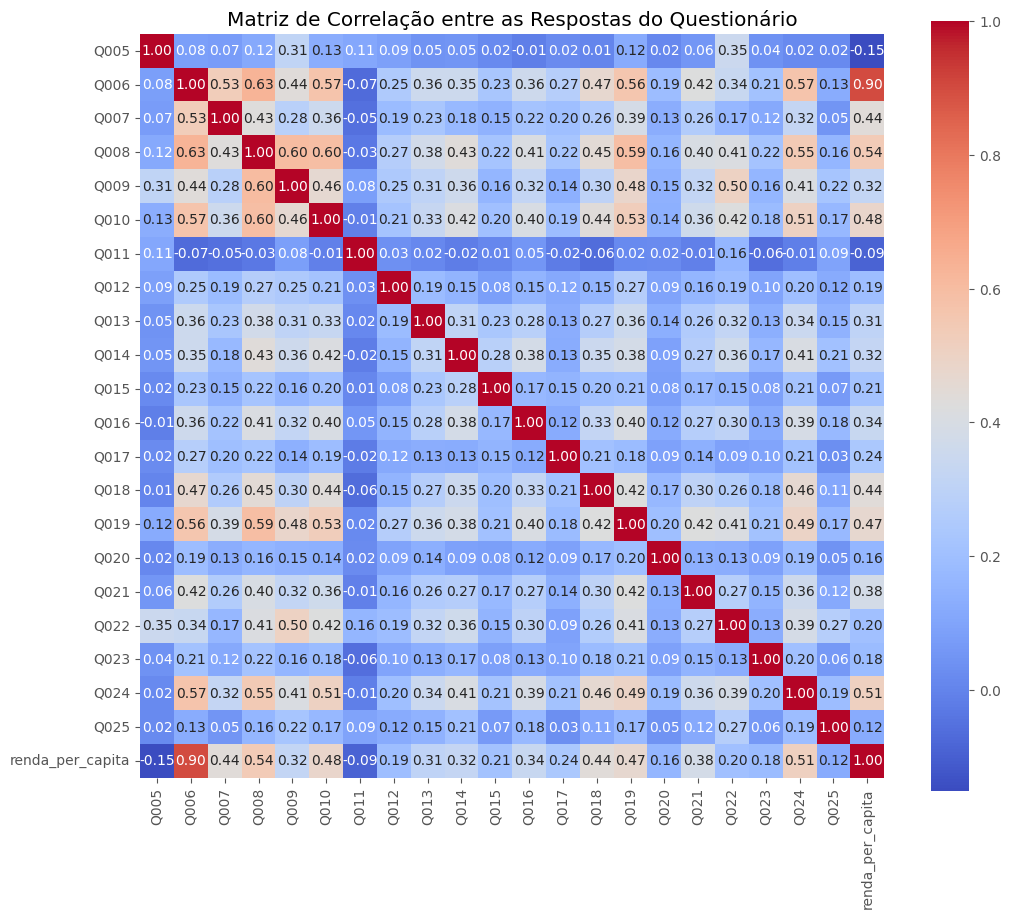

In [ ]:
correlacao = df_questionario.corr()

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre as Respostas do Questionário')
plt.show()

A hipótese não foi confirmada :(

Aqui, o esperado era que maioria das perguntas do questionário tivessem uma forte relação com a renda *per capita* familiar. Porém, isso não ocorreu.

Alguns motivos para isso podem ser:
1.  Multifatorialidade da renda: Isoladamente, cada variável pode ter um pequeno impacto

2. A conversão das variáveis categóricas não foi ideal

Ainda assim, é possível encontrar alguns padrões. Por exemplo, Q006, Q008, Q010, Q024 são as colunas que apresentam as maiores correlações positivas com outras colunas (ainda que sejam pequenas).

Q006: Qual é a renda mensal de sua família? (Some a sua renda com a dos seus familiares.)

Q008: Na sua residência tem banheiro?

Q010: Na sua residência tem carro?

Q024: Na sua residência tem computador?


Agora, quero ver se alguma pergunta do questionário tem relação com as notas.

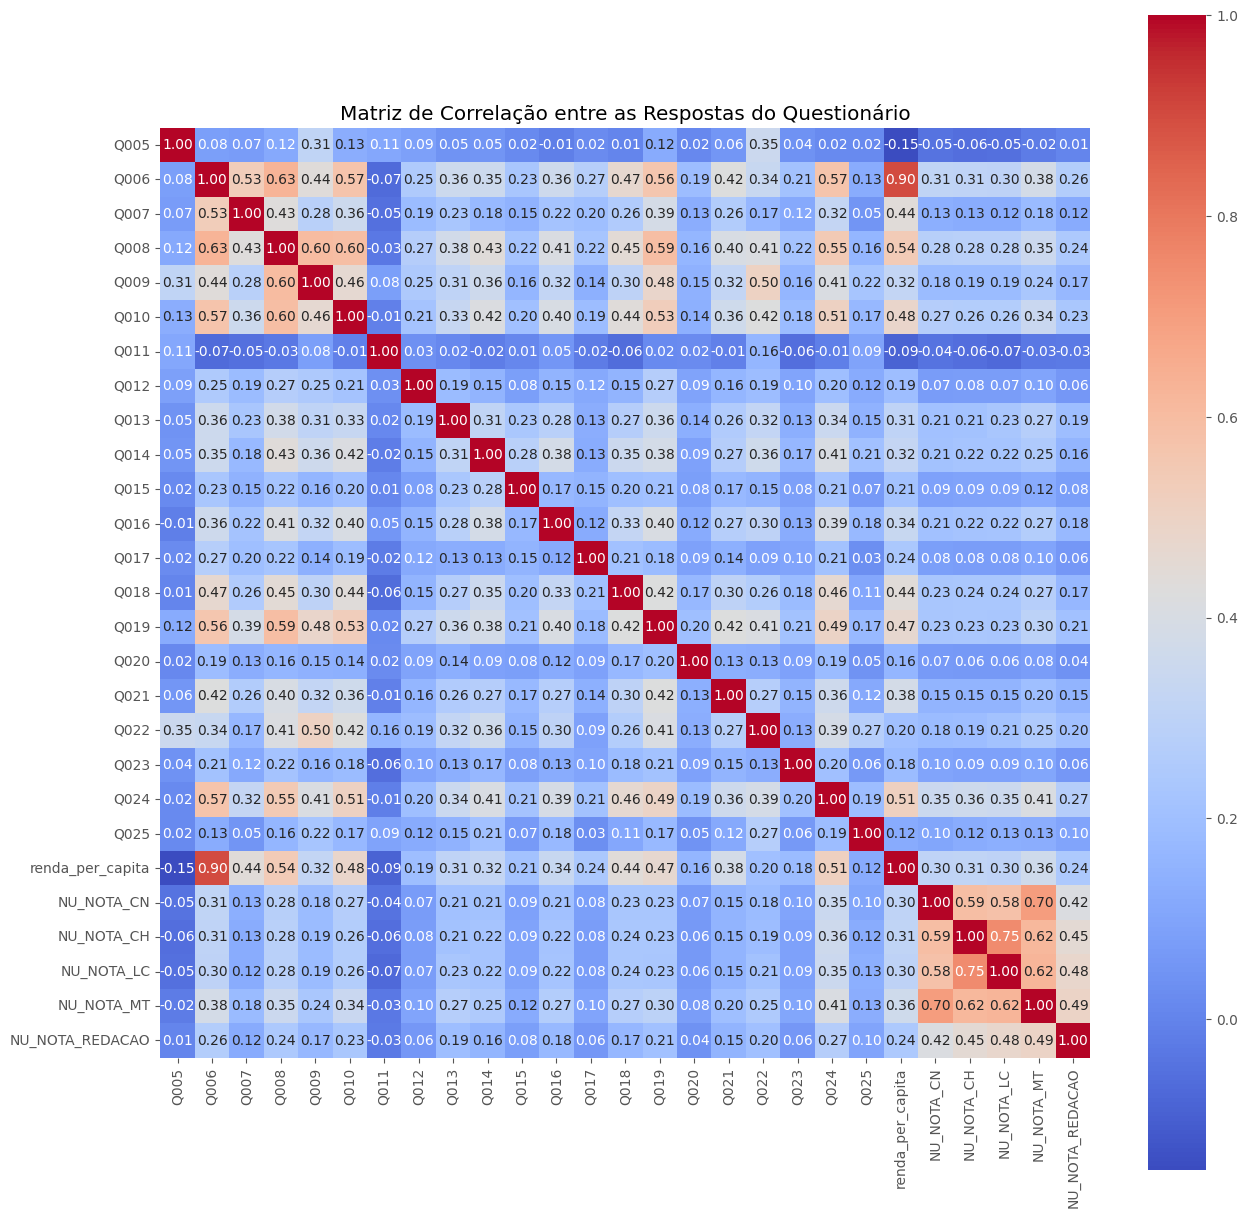

In [ ]:
df_questionario = df_questionario.copy()

df_questionario['NU_NOTA_CN'] = df_normalizado['NU_NOTA_CN']
df_questionario['NU_NOTA_CH'] = df_normalizado['NU_NOTA_CH']
df_questionario['NU_NOTA_LC'] = df_normalizado['NU_NOTA_LC']
df_questionario['NU_NOTA_MT'] = df_normalizado['NU_NOTA_MT']
df_questionario['NU_NOTA_REDACAO'] = df_normalizado['NU_NOTA_REDACAO']

correlacao = df_questionario.corr()

# Plotar o heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre as Respostas do Questionário')
plt.show()

As notas das provas não tem correlação forte com nenhuma pergunta específica do formulário socioeconômico. Mas é interessante observar que elas tem uma correlação mais forte com as renda familiar mensal do que com a renda familiar *per capita*

# Matriz de correlação da renda x notas

In [ ]:
df_notas_renda = df_normalizado.loc[:, ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'renda_per_capita']]

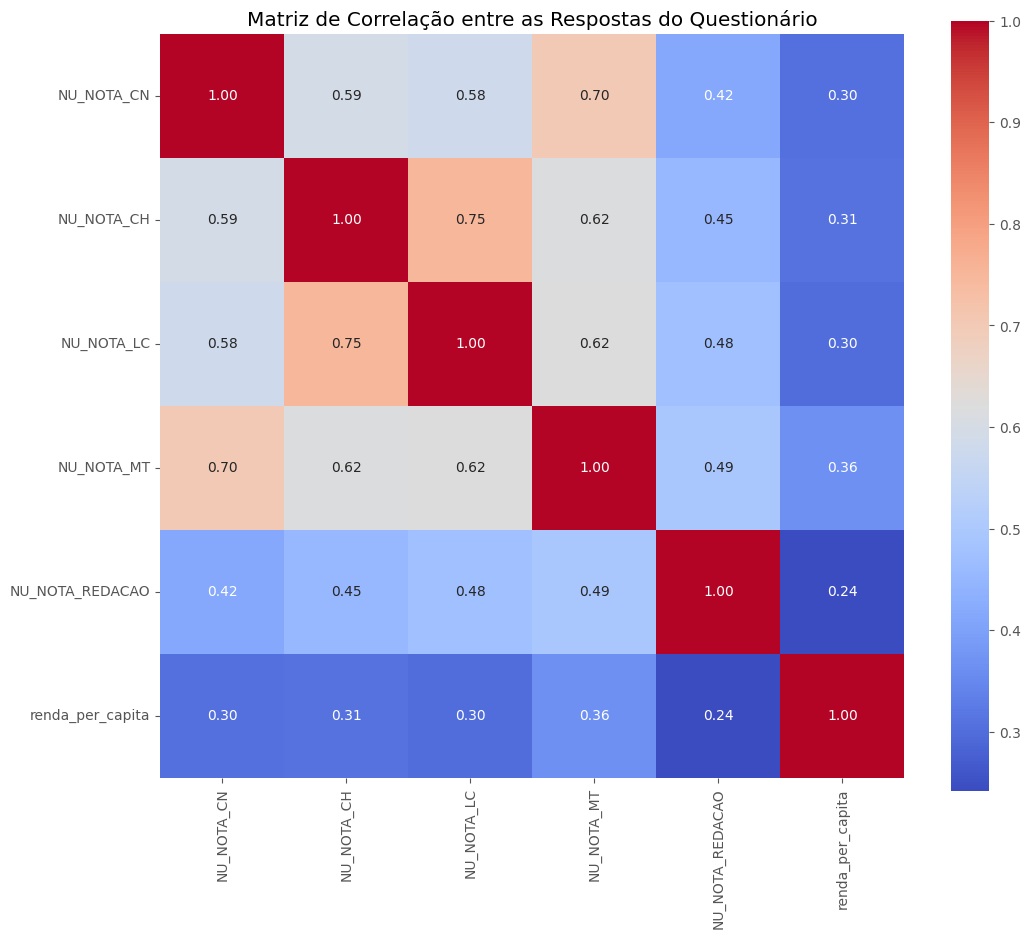

In [ ]:
correlacao = df_notas_renda.corr()

# Plotar o heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlação entre as Respostas do Questionário')
plt.show()

As notas nas provas tem pouca relação com a renda per capita familiar...

Porém, as notas de Matemática e Ciências da Natureza tem uma correlação relativamente forte. O mesmo ocorre com as notas de Ciências Humanas e Linguagens.

Isso provavemente ocorre porque essas provas são realizadas no mesmo dia.

# Clustering

In [ ]:
df_normalizado.columns


Index(['TP_FAIXA_ETARIA', 'TP_ANO_CONCLUIU', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'Q005', 'Q006', 'Q007',
       'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014', 'Q015', 'Q016',
       'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022', 'Q023', 'Q024', 'Q025',
       'ACERTOS_CN', 'ACERTOS_MT', 'ACERTOS_LC', 'ACERTOS_CH', 'ACERTOS_GERAL',
       'MEDIA_OBJETIVAS', 'renda_per_capita', 'TP_SEXO_F', 'TP_SEXO_M',
       'TP_COR_RACA_0', 'TP_COR_RACA_1', 'TP_COR_RACA_2', 'TP_COR_RACA_3',
       'TP_COR_RACA_4', 'TP_COR_RACA_5', 'TP_ST_CONCLUSAO_1',
       'TP_ST_CONCLUSAO_2', 'TP_ST_CONCLUSAO_3', 'TP_ST_CONCLUSAO_4',
       'TP_ESCOLA_1', 'TP_ESCOLA_2', 'TP_ESCOLA_3', 'IN_TREINEIRO_0',
       'IN_TREINEIRO_1', 'TP_LINGUA_0', 'TP_LINGUA_1', 'TP_STATUS_REDACAO_1.0',
       'TP_STATUS_REDACAO_2.0', 'TP_STATUS_REDACAO_3.0',
       'TP_STATUS_REDACAO_4.0', 'TP_STATUS_REDACAO_6.0',
       'TP_STATUS_REDACAO_7.0', 'TP_STATUS_REDACAO_8.0',
       'TP_

## Agrupamento inicial

Podemos iniciar a análise fazendo um agrupamento inicial por meio de algoritmo hierárquico. Essa etapa pode fornecer alguns insights sobre a distribuição dos objetos.



Gerando dendrograma: método = average, distância = euclidean


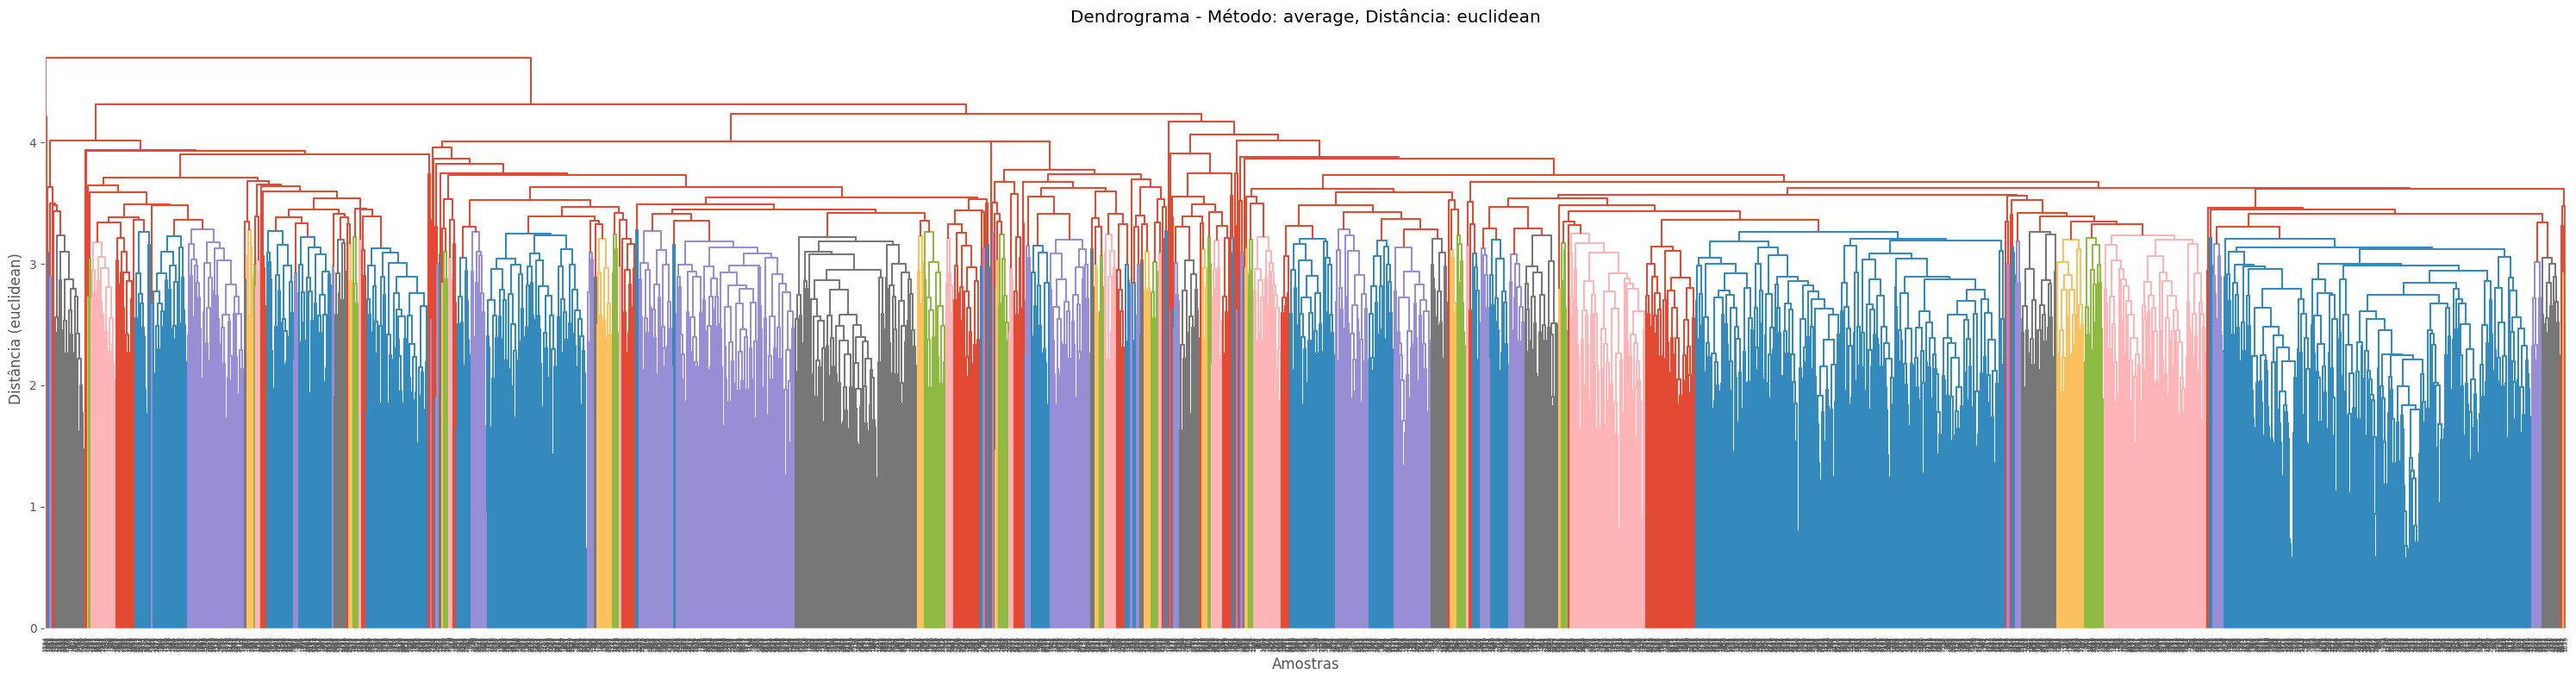

Gerando dendrograma: método = average, distância = cosine


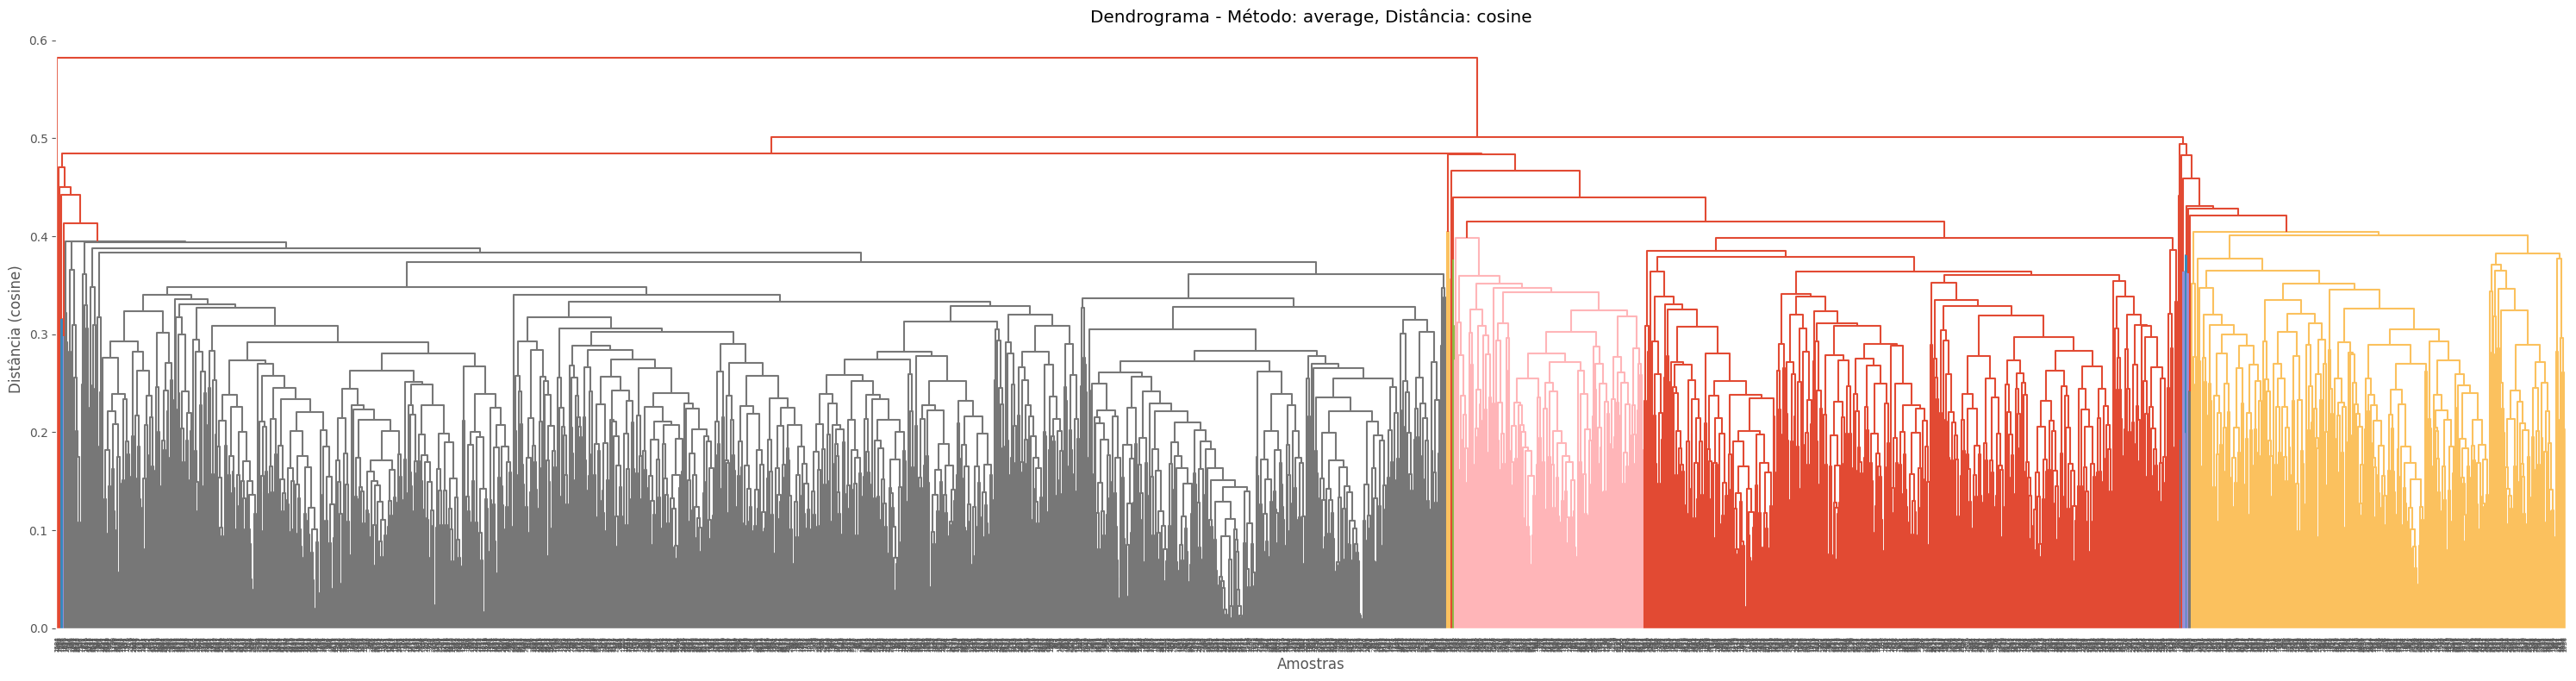

Gerando dendrograma: método = average, distância = cityblock


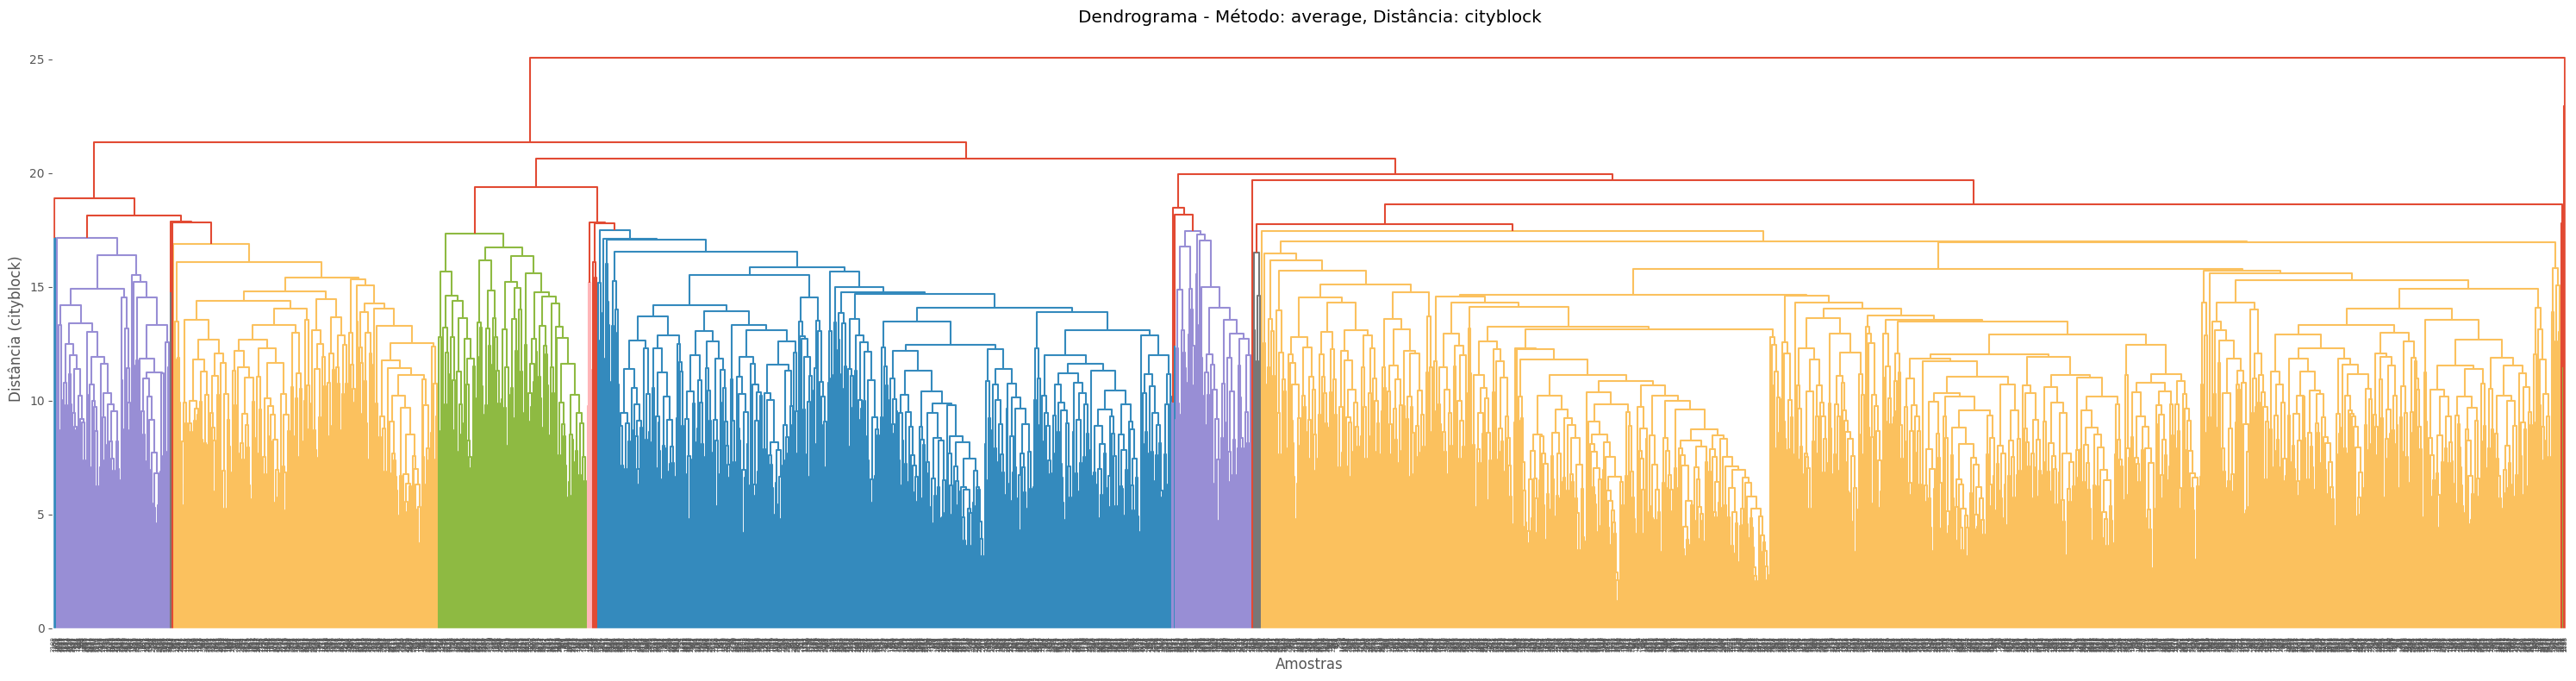

Gerando dendrograma: método = complete, distância = euclidean


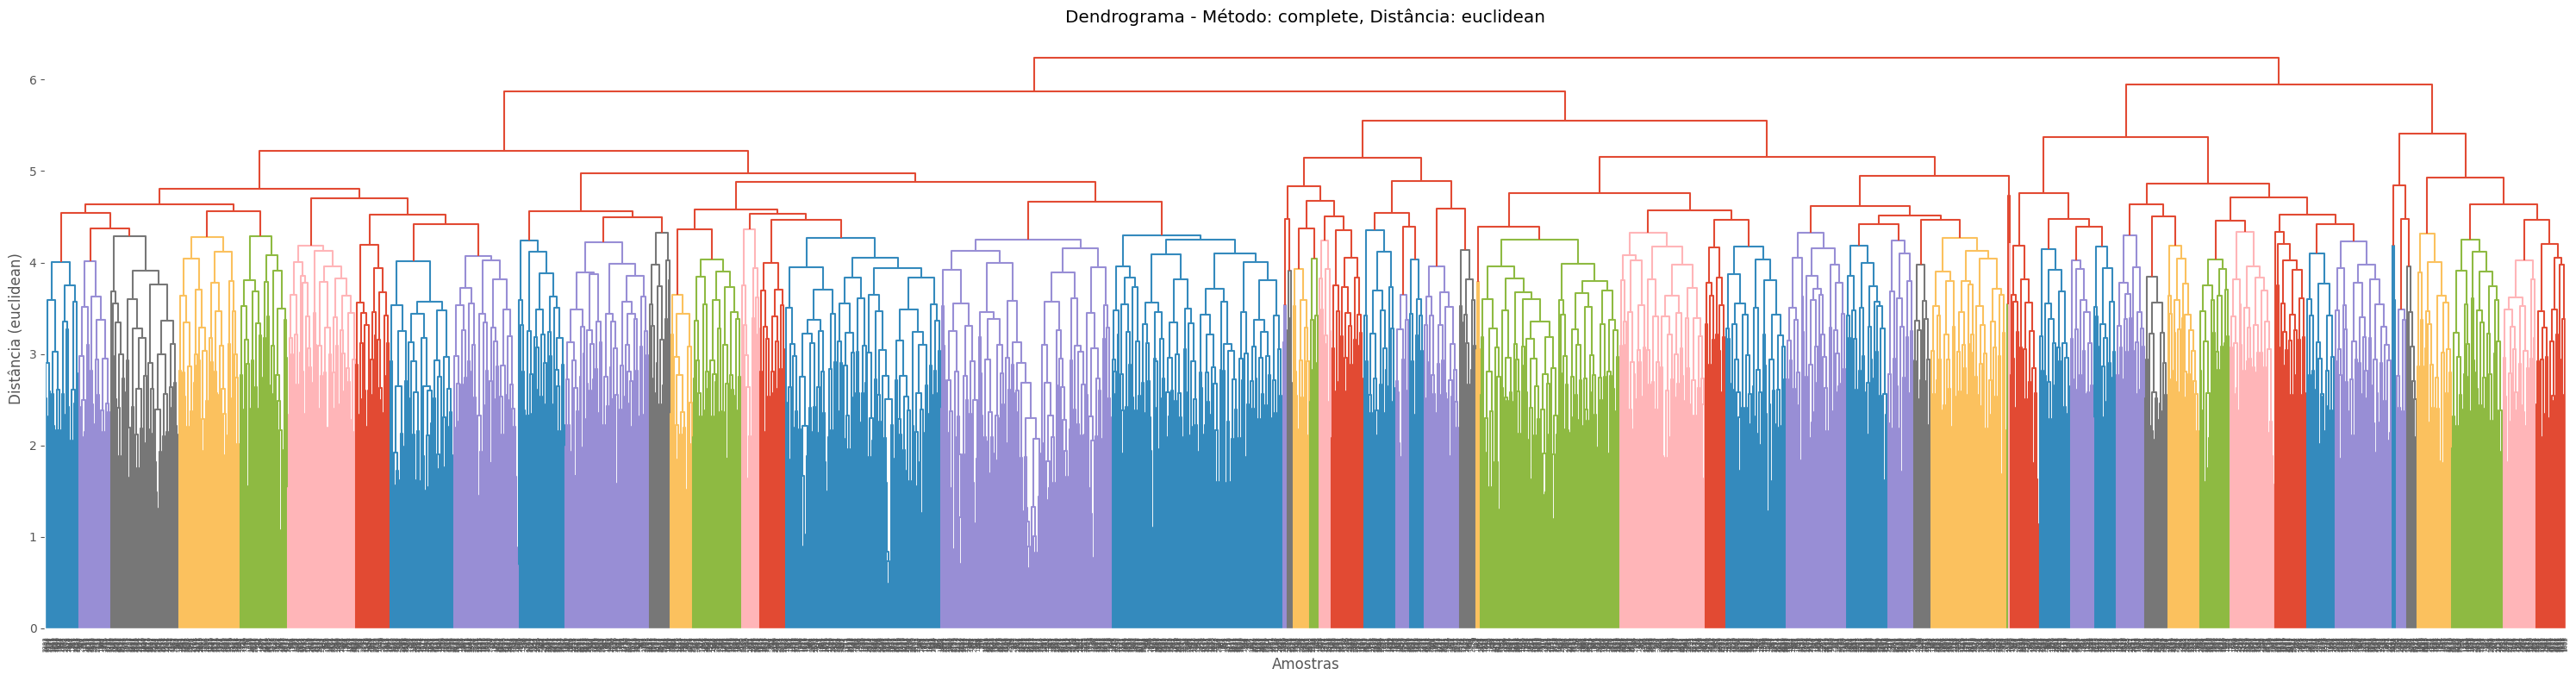

Gerando dendrograma: método = complete, distância = cosine


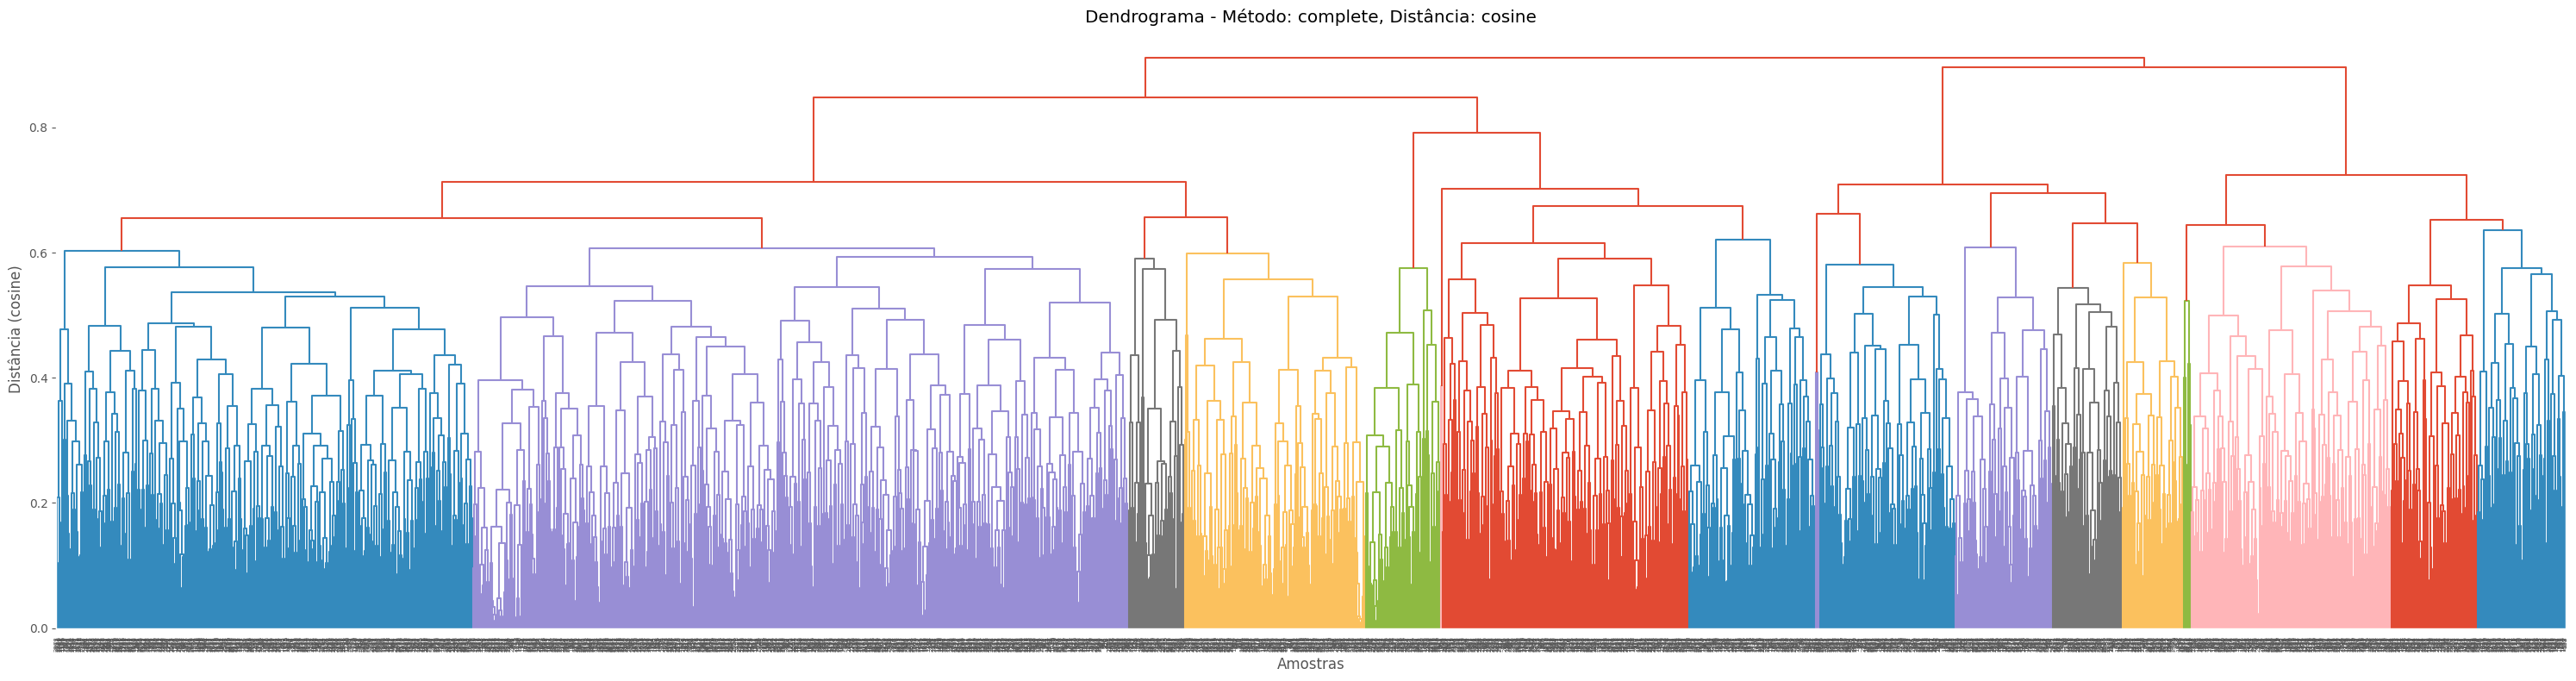

Gerando dendrograma: método = complete, distância = cityblock


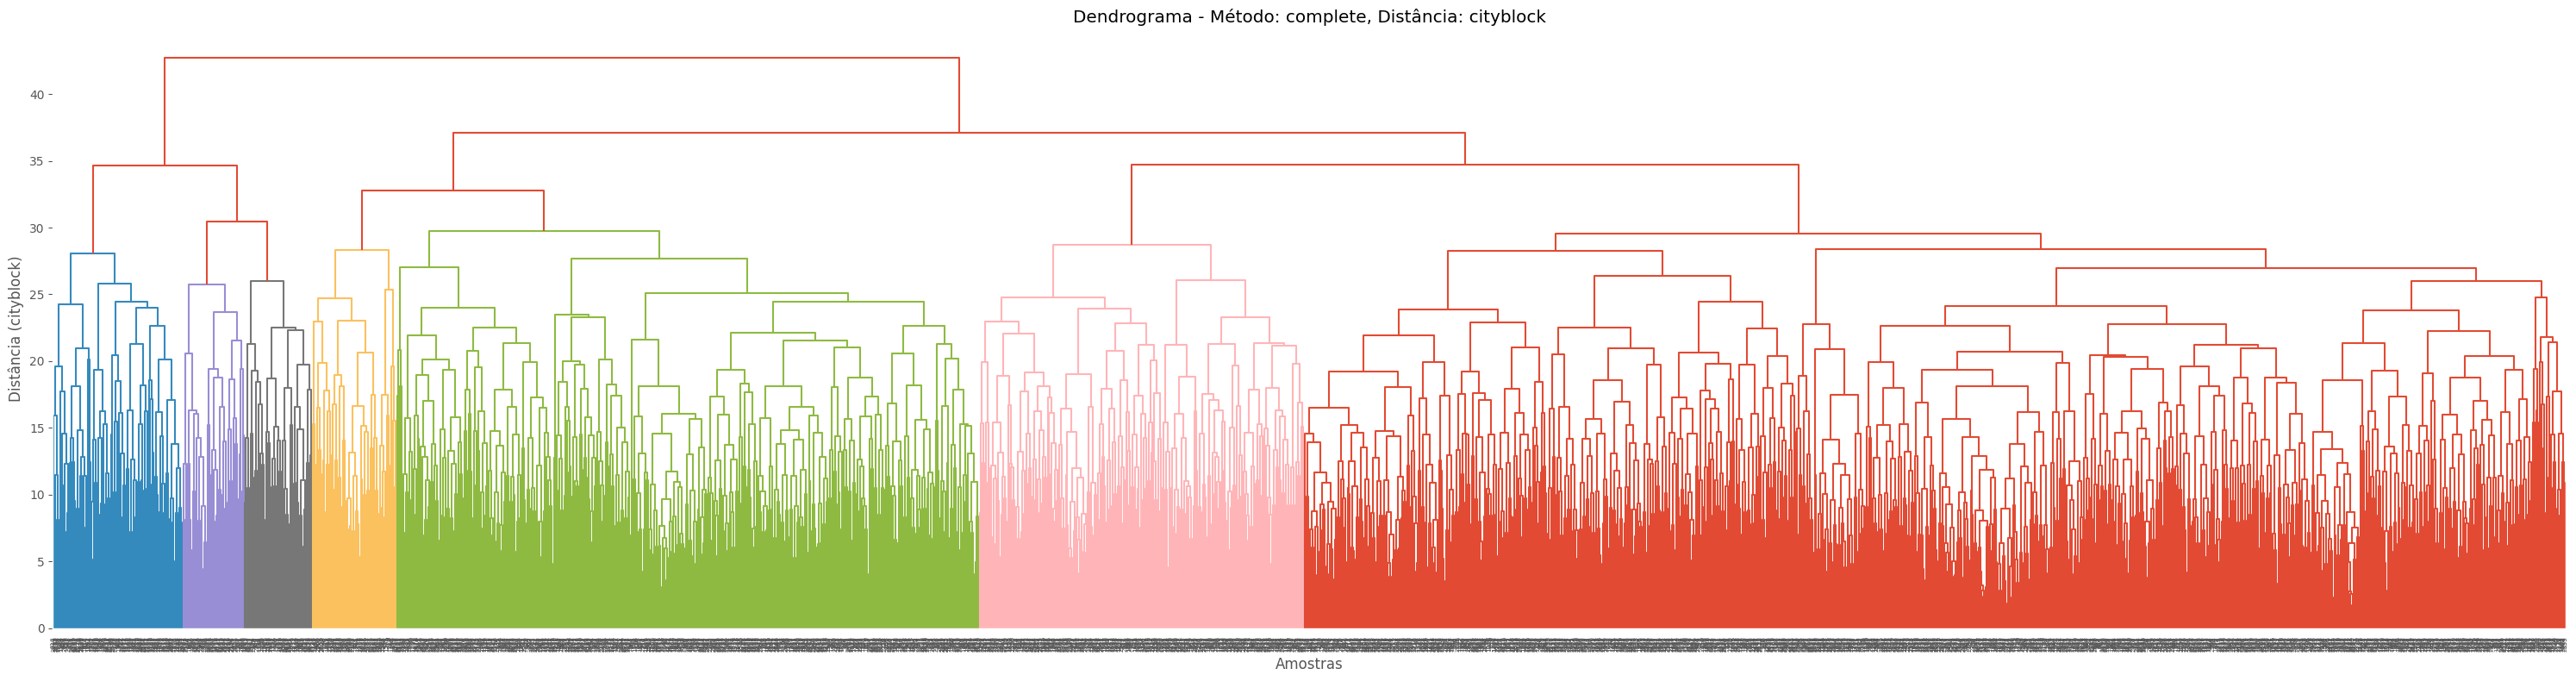

Gerando dendrograma: método = ward, distância = euclidean


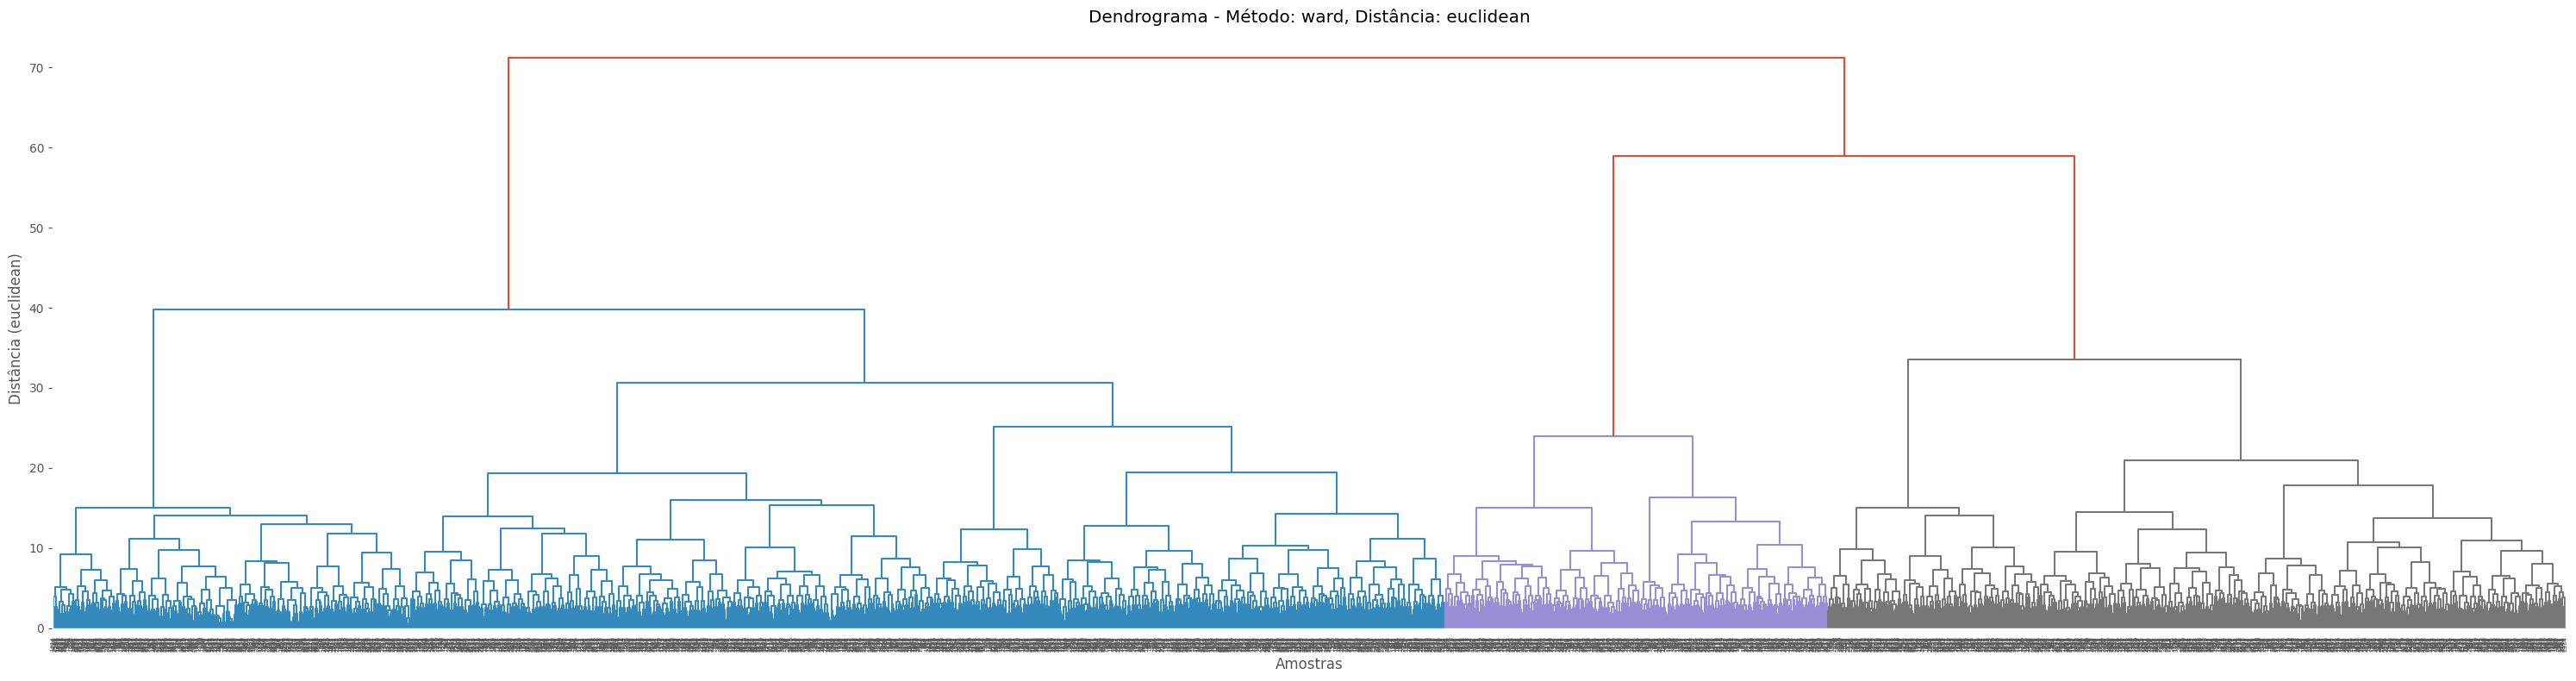

Gerando dendrograma: método = ward, distância = cosine


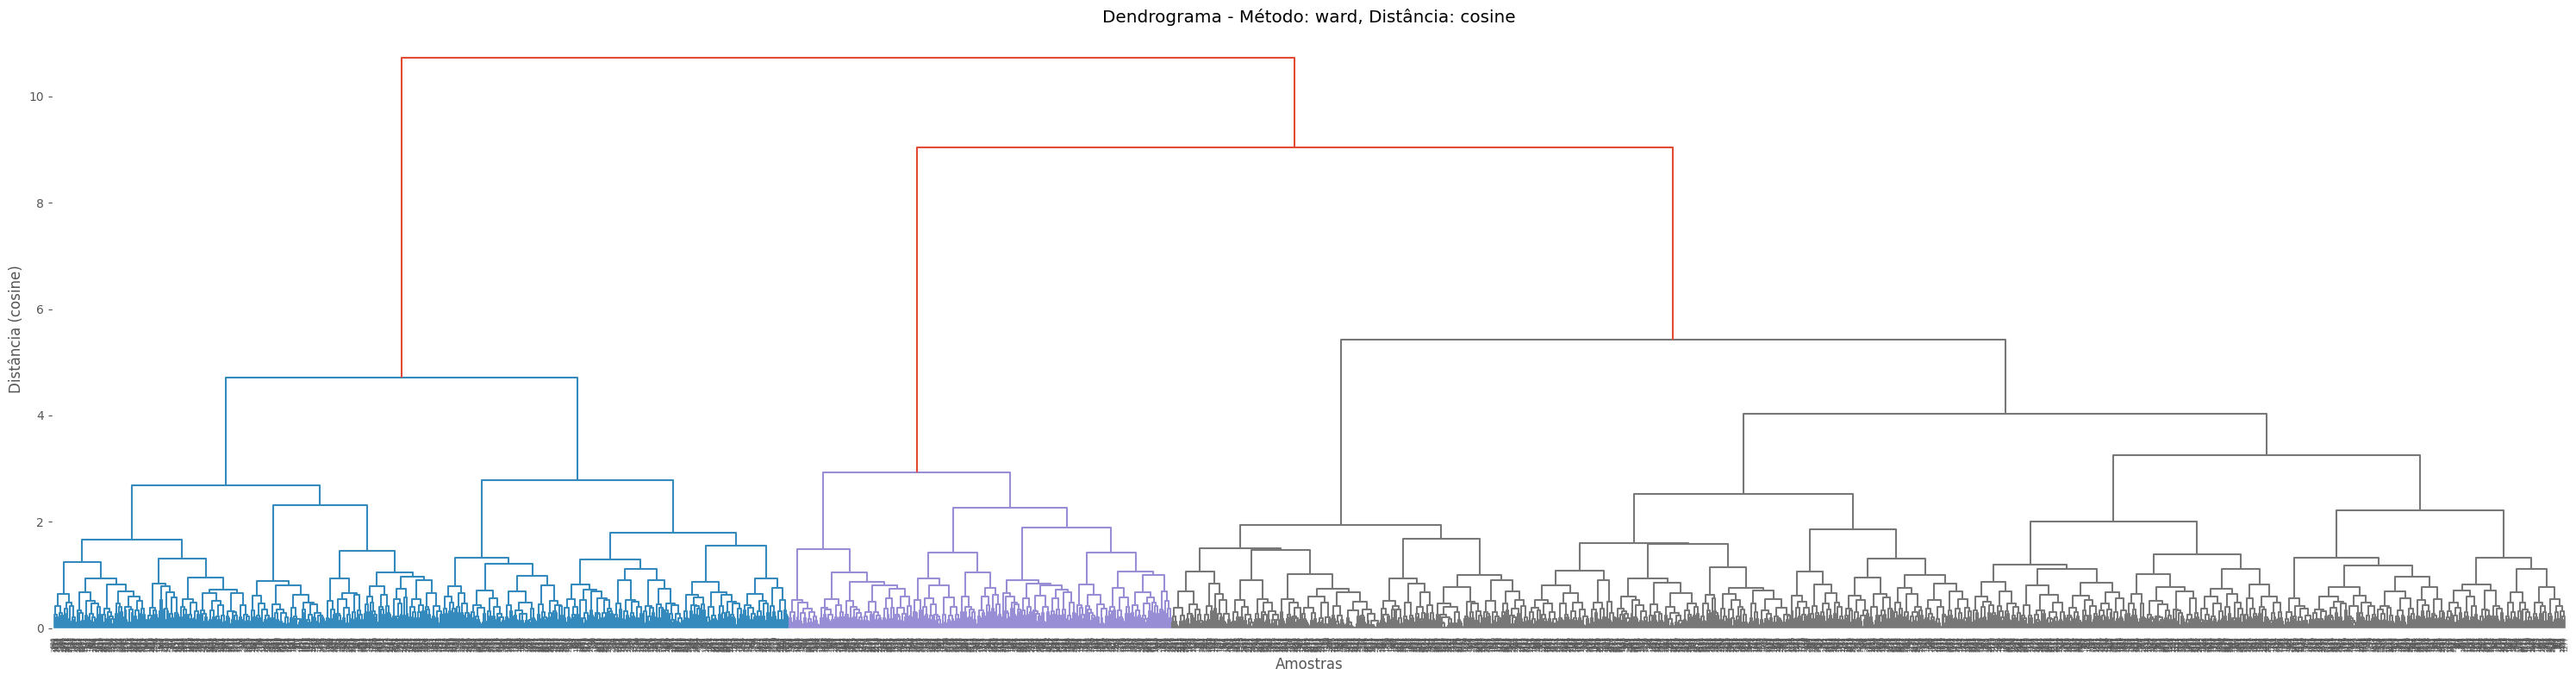

Gerando dendrograma: método = ward, distância = cityblock


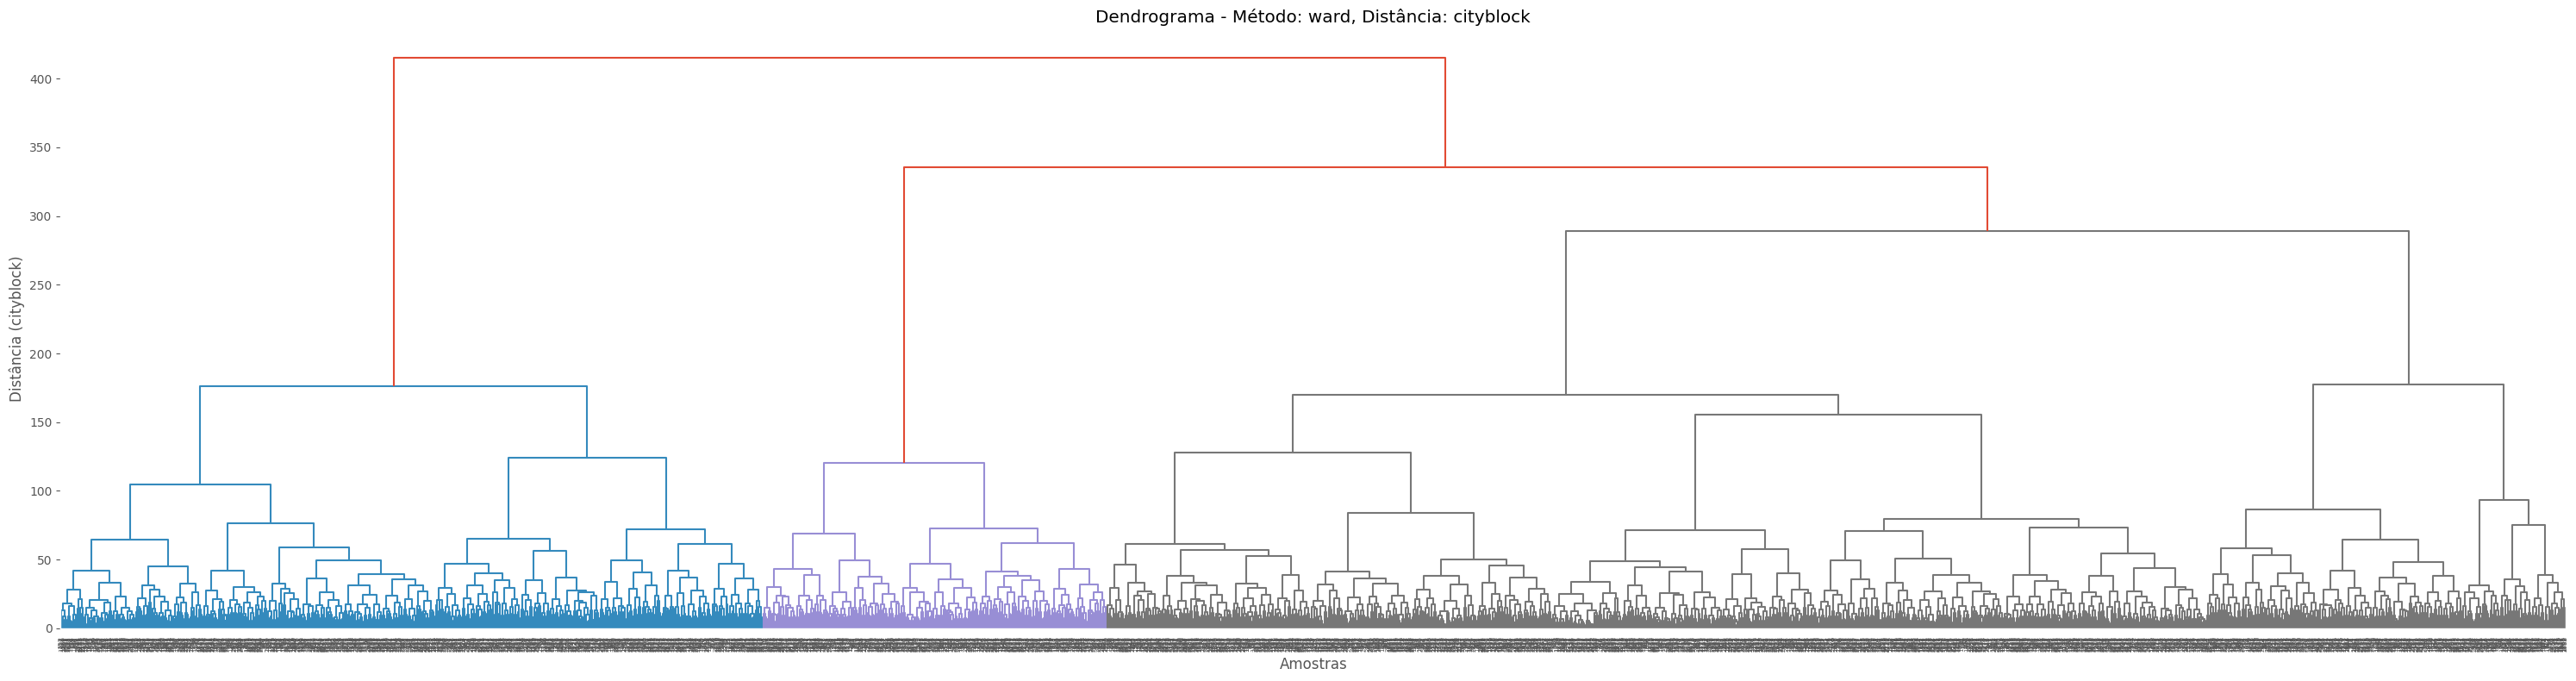

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Amostra do dataset normalizado
df_amostra = df_normalizado.sample(n=3000, random_state=42)

# Métodos de ligação e métricas de distância
metodos = ['average', 'complete', 'ward']
distancias = ['euclidean', 'cosine', 'cityblock']

for metodo in metodos:
    for distancia in distancias:
        print(f"Gerando dendrograma: método = {metodo}, distância = {distancia}")

        # Cálculo da matriz de distâncias
        dist_matrix = pdist(df_amostra, metric=distancia)

        # Geração da hierarquia
        try:
            mergings = linkage(dist_matrix, method=metodo)

            # Plot do dendrograma
            plt.figure(figsize=(30, 8))
            plt.title(f"Dendrograma - Método: {metodo}, Distância: {distancia}")
            dendrogram(mergings, leaf_rotation=90, color_threshold=0.7 * max(mergings[:, 2]))
            plt.xlabel("Amostras")
            plt.ylabel(f"Distância ({distancia})")
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Erro com método={metodo}, distância={distancia}: {e}")


Dos três métodos apresentados, o com grupos mais bem definidos, independente da métrica utilizada para medir a distância, foi o Ward. Por isso, optamos por usá-lo. E as distâncias geram dedogramas bem semelhantes, o que deixa a escolha de qual utilizar ao nosso critério. Por familiaridade do grupo com as distâncias, optamos por utilizar a distância euclidiana

## Definindo número de grupos

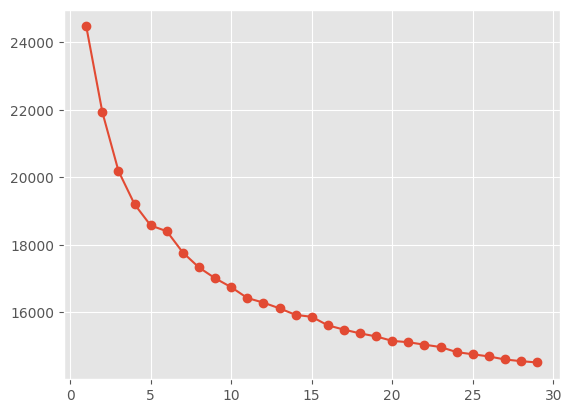

In [ ]:
# importando algoritmo k-means
from sklearn.cluster import KMeans
%matplotlib inline

# quantidade de grupos que vamos realizar os testes
ks = range(1, 30)
# armazena o valor do índice para cada partição gerada
inertias = []
for k in ks:
  # executa o k-means para aquela quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # aplica a configuração do agrupamento gerado aos dados para obter o índice
  km.fit(df_amostra)
  # calcula o erro quadrático médio
  inertias.append(km.inertia_)
# plota o gráfico
plt.plot(ks, inertias, marker='o')

Por esse gráfico e pelos dendogramas, optamos por 7 grupos para que consigamos alguns perfis dos alunos para realizarmos a análise.


Agora, faremos a análise da distribuição da quantidade de objetos em cada grupo a medida que aumentamos a quantidade de grupos.

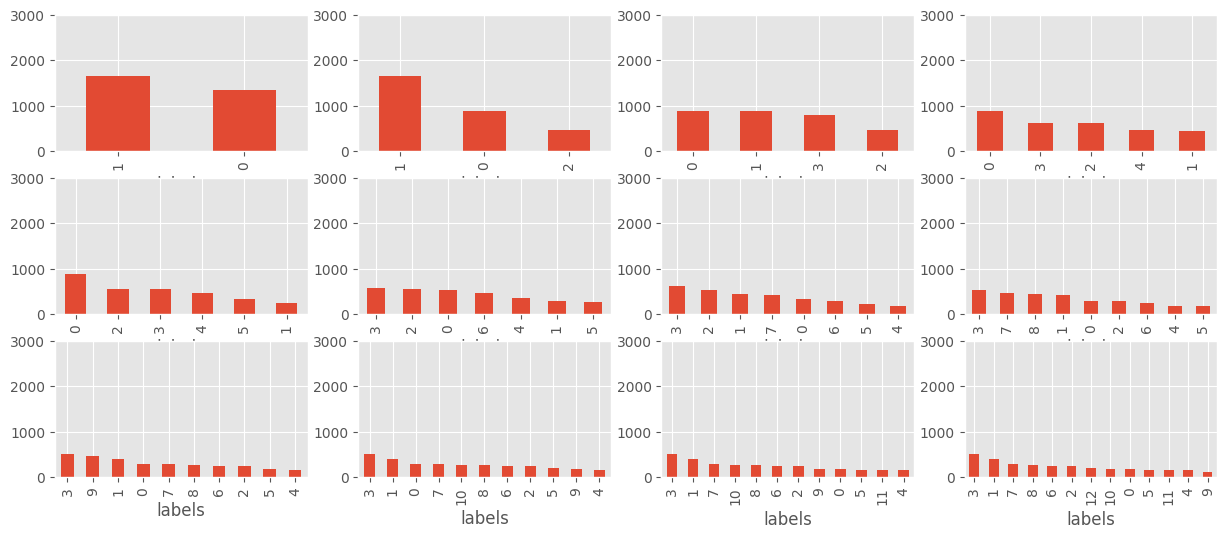

In [ ]:
# configuração do gráfico que vai ser gerado
fig, axs = plt.subplots(3,4, figsize=(15, 6), facecolor='w', edgecolor='k')
axs = axs.ravel()

# dataframe para armazenar os dados
df_aux = pd.DataFrame()

# intervalo com a quantidade de grupos que vamos dividir os dados
ks = range(2, 14)
for k in ks:
  # executa o kmeans para cada quantidade de grupos
  km = KMeans(n_clusters=k, random_state=8, n_init='auto')
  # relaciona o resultado gerado com os dados da base
  km.fit(df_amostra)
  # resgata os rótulos (grupos) para cada objeto da base
  labels = km.labels_.tolist()
  # cria um dataframe para facilitar a contagem dos objetos em cada grupo
  df_aux['labels'] = labels
  # plota a quantidade de objetos em cada grupo
  df_aux['labels'].value_counts().plot(kind='bar',ax=axs[k-2],ylim=(0,3000))

## Análise de centroides e interpretação do agrupamento

Vamos começar com o k-means com dois grupos

In [ ]:
# executando k-means com dois grupos
km = KMeans(n_clusters=7, random_state=8)
km.fit(df_amostra)
# obtendo os dois centroides
centers = km.cluster_centers_
# imprimindo os valores dos centroides
print(centers)

[[ 6.07004152e-02 -5.10702591e-15  5.60429101e-01  6.08822516e-01
   6.42149248e-01  5.04439322e-01  6.14425923e-01  1.57191643e-01
   4.48664122e-02  2.09923664e-02  2.96755725e-01  5.27671756e-01
   5.82061069e-02  1.19274809e-01  2.48091603e-01  5.91603053e-02
   7.06106870e-02  8.90585242e-03  7.76081425e-02  2.38549618e-03
   1.90839695e-02  2.51431298e-01  8.01526718e-02  7.25190840e-02
   5.60591603e-01  2.48091603e-02  5.24809160e-02  9.00763359e-01
   2.55225373e-01  2.72688719e-01  3.36323155e-01  4.11389660e-01
   3.60431674e-01  6.10466746e-01  1.34752249e-02  6.58396947e-01
   3.41603053e-01  1.14503817e-02  3.01526718e-01  9.54198473e-02
   5.72519084e-01  1.33587786e-02  5.72519084e-03  7.54951657e-15
   1.00000000e+00  1.02695630e-15  1.69135539e-17 -3.66373598e-15
   9.77099237e-01  2.29007634e-02  1.00000000e+00  1.02695630e-15
   1.94656489e-01  8.05343511e-01  9.61832061e-01  2.16840434e-18
   7.63358779e-03  1.14503817e-02  1.14503817e-02  2.16840434e-18
   5.72519

In [ ]:
# arredondando os valores das features e representando como inteiro para facilitar a visualização
centroids = pd.DataFrame(centers.round().astype(int))
# imprimindo os títulos das colunas
centroids.columns = df_amostra.keys().values
centroids.head(20)

,TP_FAIXA_ETARIA,TP_ANO_CONCLUIU,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,ACERTOS_CN,ACERTOS_MT,ACERTOS_LC,ACERTOS_CH,ACERTOS_GERAL,MEDIA_OBJETIVAS,renda_per_capita,TP_SEXO_F,TP_SEXO_M,TP_COR_RACA_0,TP_COR_RACA_1,TP_COR_RACA_2,TP_COR_RACA_3,TP_COR_RACA_4,TP_COR_RACA_5,TP_ST_CONCLUSAO_1,TP_ST_CONCLUSAO_2,TP_ST_CONCLUSAO_3,TP_ST_CONCLUSAO_4,TP_ESCOLA_1,TP_ESCOLA_2,TP_ESCOLA_3,IN_TREINEIRO_0,IN_TREINEIRO_1,TP_LINGUA_0,TP_LINGUA_1,TP_STATUS_REDACAO_1.0,TP_STATUS_REDACAO_2.0,TP_STATUS_REDACAO_3.0,TP_STATUS_REDACAO_4.0,TP_STATUS_REDACAO_6.0,TP_STATUS_REDACAO_7.0,TP_STATUS_REDACAO_8.0,TP_STATUS_REDACAO_9.0,Q001_A,Q001_B,Q001_C,Q001_D,Q001_E,Q001_F,Q001_G,Q001_H,Q002_A,Q002_B,Q002_C,Q002_D,Q002_E,Q002_F,Q002_G,Q002_H,Q003_A,Q003_B,Q003_C,Q003_D,Q003_E,Q003_F,Q004_A,Q004_B,Q004_C,Q004_D,Q004_E,Q004_F,NO_MUNICIPIO_PROVA_Agreste Potiguar,NO_MUNICIPIO_PROVA_Central Potiguar,NO_MUNICIPIO_PROVA_Desconhecida,NO_MUNICIPIO_PROVA_Leste Potiguar,NO_MUNICIPIO_PROVA_Oeste Potiguar
0,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
4,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Análise dos perfis


In [ ]:
centroids_df = pd.DataFrame(km.cluster_centers_, columns=df_amostra.columns)
centroids_df.index = [f'Perfil {i+1}' for i in range(len(centroids_df))]

print("Análise do Perfil 1")
perfil_1_caracteristicas = centroids_df.loc['Perfil 1'].sort_values(ascending=False)
print(perfil_1_caracteristicas.head(15))
print(perfil_1_caracteristicas.tail(15))

Análise do Perfil 1
TP_ST_CONCLUSAO_2        1.000000
IN_TREINEIRO_0           1.000000
TP_ESCOLA_2              0.977099
TP_STATUS_REDACAO_1.0    0.961832
Q025                     0.900763
TP_LINGUA_1              0.805344
TP_SEXO_F                0.658397
NU_NOTA_LC               0.642149
NU_NOTA_REDACAO          0.614426
MEDIA_OBJETIVAS          0.610467
NU_NOTA_CH               0.608823
TP_COR_RACA_3            0.572519
Q022                     0.560592
NU_NOTA_CN               0.560429
Q009                     0.527672
Name: Perfil 1, dtype: float64
Q015                     8.905852e-03
TP_STATUS_REDACAO_3.0    7.633588e-03
TP_STATUS_REDACAO_8.0    5.725191e-03
TP_COR_RACA_5            5.725191e-03
Q004_E                   3.816794e-03
Q017                     2.385496e-03
TP_STATUS_REDACAO_9.0    1.908397e-03
TP_ST_CONCLUSAO_1        7.549517e-15
TP_ST_CONCLUSAO_3        1.026956e-15
IN_TREINEIRO_1           1.026956e-15
TP_ST_CONCLUSAO_4        1.691355e-17
TP_STATUS_REDACAO_7.0

In [ ]:
print("Análise do Perfil 2")
perfil_2_caracteristicas = centroids_df.loc['Perfil 2'].sort_values(ascending=False)
print("Características mais fortes do Perfil 2:")
print(perfil_2_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 2:")
print(perfil_2_caracteristicas.tail(15))

Análise do Perfil 2
Características mais fortes do Perfil 2:
IN_TREINEIRO_0           1.000000
TP_ESCOLA_1              1.000000
TP_ST_CONCLUSAO_1        0.996390
TP_STATUS_REDACAO_1.0    0.945848
TP_ANO_CONCLUIU          0.900102
Q025                     0.844765
TP_LINGUA_1              0.805054
Q003_A                   0.765343
Q004_A                   0.747292
TP_COR_RACA_1            0.707581
NU_NOTA_LC               0.645596
NU_NOTA_CH               0.622635
MEDIA_OBJETIVAS          0.617023
TP_SEXO_F                0.602888
NU_NOTA_REDACAO          0.576365
Name: Perfil 2, dtype: float64

Características mais fracas do Perfil 2:
TP_STATUS_REDACAO_4.0    3.610108e-03
TP_ST_CONCLUSAO_4        3.610108e-03
TP_STATUS_REDACAO_2.0    3.610108e-03
TP_STATUS_REDACAO_9.0    3.610108e-03
Q001_G                   3.610108e-03
TP_COR_RACA_3            1.998401e-15
TP_ST_CONCLUSAO_2        2.220446e-16
TP_ESCOLA_3              1.804112e-16
IN_TREINEIRO_1           5.551115e-17
TP_ST_CONCLUSA

In [ ]:
print("Análise do Perfil 3")
perfil_3_caracteristicas = centroids_df.loc['Perfil 3'].sort_values(ascending=False)
print("Características mais fortes do Perfil 3:")
print(perfil_3_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 3:")
print(perfil_3_caracteristicas.tail(15))

Análise do Perfil 3
Características mais fortes do Perfil 3:
IN_TREINEIRO_0                       1.000000
TP_ESCOLA_1                          1.000000
TP_ST_CONCLUSAO_1                    0.994652
TP_STATUS_REDACAO_1.0                0.989305
Q025                                 0.978610
TP_LINGUA_0                          0.919786
TP_ANO_CONCLUIU                      0.896471
NU_NOTA_LC                           0.727800
MEDIA_OBJETIVAS                      0.719715
NU_NOTA_CH                           0.711477
Q022                                 0.703209
NU_NOTA_REDACAO                      0.699262
NU_NOTA_CN                           0.654126
NO_MUNICIPIO_PROVA_Leste Potiguar    0.652406
NU_NOTA_MT                           0.628920
Name: Perfil 3, dtype: float64

Características mais fracas do Perfil 3:
TP_COR_RACA_0            8.912656e-03
TP_ST_CONCLUSAO_4        5.347594e-03
TP_STATUS_REDACAO_6.0    5.347594e-03
TP_STATUS_REDACAO_3.0    3.565062e-03
TP_COR_RACA_5           

In [ ]:
print("Análise do Perfil 4")
perfil_4_caracteristicas = centroids_df.loc['Perfil 4'].sort_values(ascending=False)
print("Características mais fortes do Perfil 4:")
print(perfil_4_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 4:")
print(perfil_4_caracteristicas.tail(15))

Análise do Perfil 4
Características mais fortes do Perfil 4:
IN_TREINEIRO_0                       1.000000
TP_ESCOLA_1                          1.000000
TP_ST_CONCLUSAO_1                    0.998227
TP_STATUS_REDACAO_1.0                0.978723
Q025                                 0.923759
TP_ANO_CONCLUIU                      0.897059
TP_LINGUA_1                          0.882979
TP_SEXO_F                            0.726950
Q004_B                               0.673759
NU_NOTA_LC                           0.667960
NU_NOTA_CH                           0.635404
MEDIA_OBJETIVAS                      0.632938
NO_MUNICIPIO_PROVA_Leste Potiguar    0.624113
NU_NOTA_REDACAO                      0.612932
NU_NOTA_CN                           0.578078
Name: Perfil 4, dtype: float64

Características mais fracas do Perfil 4:
TP_STATUS_REDACAO_4.0    5.319149e-03
TP_STATUS_REDACAO_6.0    5.319149e-03
TP_STATUS_REDACAO_3.0    5.319149e-03
TP_COR_RACA_5            5.319149e-03
TP_STATUS_REDACAO_8.0   

In [ ]:
print("Análise do Perfil 5")
perfil_5_caracteristicas = centroids_df.loc['Perfil 5'].sort_values(ascending=False)
print("Características mais fortes do Perfil 5")
print(perfil_5_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 5:")
print(perfil_5_caracteristicas.tail(15))

Análise do Perfil 5
Características mais fortes do Perfil 5
IN_TREINEIRO_0                       1.000000
TP_ST_CONCLUSAO_2                    0.994382
TP_STATUS_REDACAO_1.0                0.985955
Q025                                 0.983146
TP_LINGUA_0                          0.834270
Q022                                 0.778090
NU_NOTA_REDACAO                      0.751433
NU_NOTA_LC                           0.722963
MEDIA_OBJETIVAS                      0.709023
NU_NOTA_CH                           0.694833
NO_MUNICIPIO_PROVA_Leste Potiguar    0.654494
Q009                                 0.642556
NU_NOTA_CN                           0.637947
NU_NOTA_MT                           0.625491
TP_COR_RACA_1                        0.584270
Name: Perfil 5, dtype: float64

Características mais fracas do Perfil 5:
Q001_A                   5.617978e-03
TP_ST_CONCLUSAO_4        5.617978e-03
TP_COR_RACA_5            5.617978e-03
TP_ESCOLA_1              5.617978e-03
Q002_A                   

In [ ]:
print("Análise do Perfil 6")
perfil_6_caracteristicas = centroids_df.loc['Perfil 6'].sort_values(ascending=False)
print("Características mais fortes do Perfil 6")
print(perfil_6_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 6:")
print(perfil_6_caracteristicas.tail(15))

Análise do Perfil 6
Características mais fortes do Perfil 6
TP_COR_RACA_3            1.000000
TP_ESCOLA_1              1.000000
IN_TREINEIRO_0           1.000000
TP_ST_CONCLUSAO_1        1.000000
TP_STATUS_REDACAO_1.0    0.988506
TP_ANO_CONCLUIU          0.871153
Q003_A                   0.850575
Q025                     0.846743
TP_LINGUA_1              0.804598
Q004_A                   0.800766
NU_NOTA_LC               0.639879
MEDIA_OBJETIVAS          0.613974
NU_NOTA_CH               0.612532
TP_SEXO_F                0.605364
NU_NOTA_REDACAO          0.576433
Name: Perfil 6, dtype: float64

Características mais fracas do Perfil 6:
Q004_E                   2.081668e-17
TP_STATUS_REDACAO_9.0    4.987330e-18
TP_ST_CONCLUSAO_2        0.000000e+00
TP_ST_CONCLUSAO_4       -8.673617e-19
TP_STATUS_REDACAO_7.0   -1.734723e-18
TP_STATUS_REDACAO_2.0   -1.734723e-18
TP_STATUS_REDACAO_3.0   -4.336809e-18
TP_COR_RACA_5           -1.387779e-17
TP_COR_RACA_0           -3.295975e-17
TP_ST_CONCLUSAO

In [ ]:
print("Análise do Perfil 7")
perfil_7_caracteristicas = centroids_df.loc['Perfil 7'].sort_values(ascending=False)
print("Características mais fortes do Perfil 7:")
print(perfil_7_caracteristicas.head(15))
print("\nCaracterísticas mais fracas do Perfil 7:")
print(perfil_7_caracteristicas.tail(15))

Análise do Perfil 7
Características mais fortes do Perfil 7:
TP_ST_CONCLUSAO_3        1.000000
IN_TREINEIRO_1           1.000000
TP_ESCOLA_1              1.000000
Q025                     0.949672
TP_STATUS_REDACAO_1.0    0.938731
Q022                     0.681619
NU_NOTA_LC               0.670770
MEDIA_OBJETIVAS          0.646089
NU_NOTA_CH               0.643326
TP_SEXO_F                0.641138
NU_NOTA_REDACAO          0.630510
Q009                     0.605033
NU_NOTA_CN               0.583722
TP_LINGUA_0              0.579869
NU_NOTA_MT               0.549863
Name: Perfil 7, dtype: float64

Características mais fracas do Perfil 7:
Q017                     6.564551e-03
TP_COR_RACA_4            6.564551e-03
TP_STATUS_REDACAO_6.0    4.376368e-03
TP_STATUS_REDACAO_8.0    4.376368e-03
TP_COR_RACA_5            4.376368e-03
TP_STATUS_REDACAO_9.0    2.188184e-03
TP_STATUS_REDACAO_2.0    2.188184e-03
TP_ST_CONCLUSAO_1        6.661338e-15
TP_ST_CONCLUSAO_2        1.998401e-15
TP_ST_CONCLUSA

## Aplicação do metóide para localizarmos  o elemento central


In [ ]:
from scipy.spatial.distance import cdist

# Função para obter a amostra mais próxima do centroide para cada cluster
def get_cluster_representative_samples(cluster_centers, data_points, original_indices, n=1):
    representative_samples_indices = []
    for i, cluster_center in enumerate(cluster_centers):
        # Calcula as distâncias euclidianas entre todos os pontos de dados e o centroide do cluster atual
        distances = cdist(data_points, cluster_center.reshape(1, -1), metric='euclidean')

        # Pega os índices dos 'n' pontos de dados com as menores distâncias
        # np.argsort retorna os índices que classificariam um array; queremos as menores distâncias
        closest_indices_in_sample = distances.flatten().argsort()[:n]

        # Mapeia esses índices da amostra de volta para o índice do DataFrame original
        # (Isso assume que original_indices são os índices reais de df_normalizado)
        original_closest_indices = [original_indices[idx] for idx in closest_indices_in_sample]
        representative_samples_indices.append(original_closest_indices)
    return representative_samples_indices

# Obtém os índices originais do DataFrame amostrado para vincular de volta ao conjunto de dados completo, se necessário
original_indices_of_sample = df_amostra.index.tolist()

# Resgata os índices dos participantes mais próximos de cada centroide
# Usando df_amostra.values como data_points, pois cdist espera um array numpy
cluster_representative_indices = get_cluster_representative_samples(
    km.cluster_centers_,
    df_amostra.values,
    original_indices_of_sample,
    n=1
)

# Exibe as características dos participantes centrais
print("### Participantes Centrais para Cada Cluster ###")
for i, indices in enumerate(cluster_representative_indices):
    print(f"\nCluster {i+1}: (Índices dos participantes mais centrais do df_normalizado original)")
    for idx in indices:
        print(f"  - Índice do Participante: {idx}")


### Participantes Centrais para Cada Cluster ###

Cluster 1: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 12490

Cluster 2: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 10777

Cluster 3: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 17177

Cluster 4: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 14984

Cluster 5: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 8020

Cluster 6: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 7748

Cluster 7: (Índices dos participantes mais centrais do df_normalizado original)
  - Índice do Participante: 21208


Agora, vamos exibir as principais caracteristicas do elemento mais central de cada cluster

In [ ]:
print("### Características do Participante Mais Central para Cada Cluster ###")
for i, indices in enumerate(cluster_representative_indices):
    print(f"\nCluster {i+1}:")
    for idx in indices:
        print(f"  - Índice do Participante: {idx}")

        # Pega as características do participante central como uma Série Pandas
        central_participant_features = df_amostra.loc[idx]

        # Ordena todas as características do maior para o menor
        sorted_desc = central_participant_features.sort_values(ascending=False)
        print("  - Características (ordenadas do maior para o menor):")
        for feature, value in sorted_desc.items():
            print(f"    - {feature}: {value:.1f}")


### Características do Participante Mais Central para Cada Cluster ###

Cluster 1:
  - Índice do Participante: 12490
  - Características (ordenadas do maior para o menor):
    - Q025: 1.0
    - TP_LINGUA_1: 1.0
    - TP_STATUS_REDACAO_1.0: 1.0
    - NO_MUNICIPIO_PROVA_Oeste Potiguar: 1.0
    - Q002_E: 1.0
    - Q003_A: 1.0
    - Q004_B: 1.0
    - Q001_B: 1.0
    - IN_TREINEIRO_0: 1.0
    - TP_COR_RACA_3: 1.0
    - TP_SEXO_F: 1.0
    - TP_ESCOLA_2: 1.0
    - TP_ST_CONCLUSAO_2: 1.0
    - NU_NOTA_LC: 0.7
    - NU_NOTA_REDACAO: 0.6
    - MEDIA_OBJETIVAS: 0.6
    - NU_NOTA_CH: 0.5
    - NU_NOTA_CN: 0.5
    - Q009: 0.5
    - NU_NOTA_MT: 0.4
    - ACERTOS_LC: 0.3
    - ACERTOS_GERAL: 0.3
    - ACERTOS_MT: 0.3
    - Q019: 0.2
    - Q008: 0.2
    - Q012: 0.2
    - Q022: 0.2
    - ACERTOS_CH: 0.2
    - ACERTOS_CN: 0.2
    - Q005: 0.2
    - Q006: 0.0
    - TP_FAIXA_ETARIA: 0.0
    - renda_per_capita: 0.0
    - Q023: 0.0
    - Q021: 0.0
    - Q016: 0.0
    - Q017: 0.0
    - Q024: 0.0
    - Q014: 0